In [ ]:
pip install selenium

     |████████████████████████████████| 968 kB 5.1 MB/s 
     |████████████████████████████████| 138 kB 58.7 MB/s 
     |████████████████████████████████| 359 kB 54.2 MB/s 
     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 3.6 MB 46.6 MB/s 
     |████████████████████████████████| 58 kB 4.7 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
!pip install fuzzywuzzy==0.15.0

!pip install python-Levenshtein

     |████████████████████████████████| 50 kB 6.4 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149868 sha256=69c8f15aad8cb95afa4394b0c318c355f6baf6a29e0b46987d4123be85b6bd8b
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

from random import  shuffle
import pandas as pd
import time
import dbm

ModuleNotFoundError: ignored

In [ ]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [ ]:

option = webdriver.ChromeOptions()

# Run the argument with incognito
# option.add_argument(' — incognito')
driver = webdriver.Chrome(executable_path='chromedriver')

WebDriverException: ignored

In [ ]:
link='http://cms.nic.in/ncdrcusersWeb/search.do?method=loadSearchPub'
driver.get(link)

In [ ]:
years=[2019,2020,2021]
id_states=[24,35,46,31,51,49,47]
name_states=['Delhi','Maharashtra','Tamil Nadu','Karnataka','West Bengal','Uttar Pradesh','Telangana']

In [ ]:
for s_id in range(len(id_states)):
    webtable_df=pd.DataFrame({})
    for j in range(len(years)):
        driver.find_element(By.ID,'dtof').click()
        text_area = driver.find_element(By.ID,'stDate')
        text_area.clear()
        text_area.send_keys("01/01/"+str(years[j]))

        text_area = driver.find_element(By.ID,'endDate')
        text_area.clear()
        text_area.send_keys("31/12/"+str(years[j]))

        driver.find_element(By.XPATH,'//*[@id="searchBy"]/option[9]').click()
        #print(driver.find_element(By.XPATH,'//*[@id="stateId"]/option[51]'))
        driver.find_element(By.XPATH,'//*[@id="stateId"]/option['+str(id_states[s_id])+']').click()
        driver.find_element(By.XPATH,'//*[@id="searchImg"]').click()
        time.sleep(10)
        try:
            while(True):
                no_columns=len(driver.find_elements(By.XPATH,'//*[@id="placeholder1"]/table[1]/tbody/tr[1]/th'))
                no_rows=len(driver.find_elements(By.XPATH,'//*[@id="placeholder1"]/table[1]/tbody/tr'))
                links=[]
                for i in range(2,no_rows+1):
                    links.append(driver.find_element(By.XPATH,'/html/body/form/div/div[5]/div/table[1]/tbody/tr['+str(i)+']/td[1]/a').get_attribute('href'))
                temp_df = pd.read_html(driver.find_element(By.XPATH,'//*[@id="placeholder1"]/table[1]').get_attribute('outerHTML'))[0]
                temp_df['Get PDF']=links
                webtable_df=pd.concat([webtable_df,temp_df],ignore_index=True)
                driver.find_elements(By.XPATH,"//a[contains(text(),'Next')]")[0].click()
                time.sleep(10)
        except:
            pass
        
        print("Fetching data for "+name_states[s_id]+" "+str(years[j])+" completed")

    webtable_df.to_csv(name_states[s_id]+".csv")
    time.sleep(10)
        

Fetching data for West Bengal 2019 completed
Fetching data for West Bengal 2020 completed
Fetching data for West Bengal 2021 completed


In [ ]:
for s_id in range(len(id_states)):
    df=pd.read_csv(name_states[s_id]+".csv")
    renamed_df=df.rename(columns={'Get PDF':'Document Link'})
    renamed_df.to_csv(name_states[s_id]+".csv", index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_DL =pd.read_csv('/content/drive/MyDrive/Legal Info Retrival/Delhi.csv')
df_KA =pd.read_csv('/content/drive/MyDrive/Legal Info Retrival/Karnataka.csv')
df_MH = pd.read_csv('/content/drive/MyDrive/Legal Info Retrival/Maharashtra.csv')
df_TN = pd.read_csv('/content/drive/MyDrive/Legal Info Retrival/Tamil Nadu.csv')
df_TG = pd.read_csv('/content/drive/MyDrive/Legal Info Retrival/Telangana.csv')
df_UP = pd.read_csv('/content/drive/MyDrive/Legal Info Retrival/Uttar Pradesh.csv')
df_WB = pd.read_csv('/content/drive/MyDrive/Legal Info Retrival/West Bengal.csv')

In [ ]:
df_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Case No.              378 non-null    object 
 1   Complainant           378 non-null    object 
 2   Respondent            378 non-null    object 
 3   Complainant Advocate  285 non-null    object 
 4   Respondent Advocate   0 non-null      float64
 5   Date of Filing        378 non-null    object 
 6   Date of Disposal      378 non-null    object 
 7   Date of Upload        378 non-null    object 
 8   Document Link         378 non-null    object 
dtypes: float64(1), object(8)
memory usage: 26.7+ KB


In [ ]:
df_DL.describe()

,Respondent Advocate
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [ ]:
choices = df_DL['Complainant']
print(choices)
choices_df = pd.DataFrame(choices)
print(choices_df.iloc[219])

0                                   AJAY SINGH
1                    SH. AKHILESH KUMAR SHARMA
2                           SUNIL KUMAR & ANR.
3                   RAJESH SHARMA (HUF) & ANR.
4                                 RAJIB BISWAS
                        ...                   
373    APOLLO MUNICH HEALTH INSURANCE CO. LTD.
374            THE ORIENTAL INSURANCE CO. LTD.
375          MINISTRY OF INDIAN RAILWAY & ORS.
376                             MS.MADHU GUPTA
377                     DEVANAND DHAROGA SINGH
Name: Complainant, Length: 378, dtype: object
Complainant    M/S MAX LIFE INSURANCE CO. LTD.
Name: 219, dtype: object


In [ ]:
possibilities = process.extract("AJAY SINGH", choices,limit=400,scorer=fuzz.token_set_ratio)
[possible for possible in possibilities if possible[1] > 90]

[('AJAY SINGH', 100, 0)]

In [ ]:
delhi_complainants = df_DL.groupby('Complainant')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(delhi_complainants)

                                                    Case No.
Complainant                                                 
M/S AJS BUILDERS PVT. LTD. & ANR.                         57
SUNITA AGGARWAL                                            6
LIFE INS. COROPRATION OF INDIA & ANR                       4
MRS. SAMI VAKSHISH & ANR.                                  2
LIFE INSURANCE CORPORATION OF INDIA & ANR.                 2
M/S M.T.N.L. EMPLOYEES CO-OP. THRIFT & CREDIT S...         2
SH. MUKESH PANDEY                                          2
M/S ORIENTAL INSURANCE CO. LTD.                            2
M/S THE ORIENTAL INSURANCE CO. LTD.                        2
HDFC BANK LTD.                                             2


In [ ]:
state = input()
print("Complainant: 0, Respondent: 1, Complainant Advocate: 2, Respondent Advocate: 3, Longest running cases: 4, Shortest running cases: 5")
analysis_type = input()

Delhi
Complainant: 0, Respondent: 1, Complainant Advocate: 2, Respondent Advocate: 3, Longest running cases: 4, Shortest running cases: 5
Complainant Advocate


Delhi
Complainant: 0, Respondent: 1, Complainant Advocate: 2, Respondent Advocate: 3, Longest running cases: 4, Shortest running cases: 5, Persons involved: 6, Advocates involved: 7
Complainant
[['M/S AJS BUILDERS PVT. LTD. & ANR.', 57], ['M/S ORIENTAL INSURANCE CO. LTD.', 8], ['SUNITA AGGARWAL', 6], ['LIFE INSURANCE CORPORATION OF INDIA & ANR.', 6], ['MAX BUPA HEALTH INSURANCE CO. LTD.', 4], ['SH. RAKESH KUMAR BHOLA & ANR.', 3], ['SH. AKHILESH KUMAR SHARMA', 2], ['PAWAN KUMAR SHARMA', 2], ['M/S M.T.N.L. EMPLOYEES CO-OP. THRIFT & CREDIT SOCIETY LTD.', 2], ['SH. BALJEET SINGH', 2]]
['M/S AJS BUILDERS PVT. LTD. & ANR.', 'M/S ORIENTAL INSURANCE CO. LTD.', 'SUNITA AGGARWAL', 'LIFE INSURANCE CORPORATION OF INDIA & ANR.', 'MAX BUPA HEALTH INSURANCE CO. LTD.', 'SH. RAKESH KUMAR BHOLA & ANR.', 'SH. AKHILESH KUMAR SHARMA', 'PAWAN KUMAR SHARMA', 'M/S M.T.N.L. EMPLOYEES CO-OP. THRIFT & CREDIT SOCIETY LTD.', 'SH. BALJEET SINGH']
[57, 8, 6, 6, 4, 3, 2, 2, 2, 2]
{'Complainant': ['M/S AJS BUILDERS PV

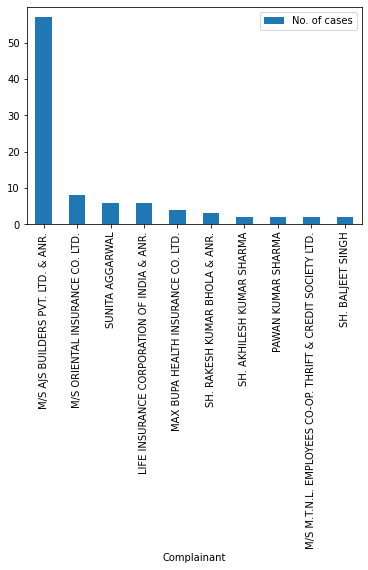

In [ ]:
def analytics(state,analysis_type):
  df_state = pd.read_csv('/content/drive/MyDrive/Legal Info Retrival/'+state+'.csv')
  if analysis_type =="Longest running cases" or analysis_type =="Shortest running cases":
     df_state['st_dt'] = pd.to_datetime(df_state['Date of Filing'], errors='coerce', format='%d-%m-%Y')
     df_state['end_dt'] = pd.to_datetime(df_state['Date of Disposal'], errors='coerce', format='%d-%m-%Y')
     df_state['diff'] = (df_state['end_dt'] - df_state['st_dt']).dt.days
     #print (df_DL.head())
     
     if analysis_type =="Longest running cases":
       top =df_state.sort_values(['diff'], ascending=False).head(10)
       #print(top[['Case No.','diff']])
    
     else:
       top =df_state.sort_values(['diff'], ascending=True).head(10)
       #print(top[['Case No.','diff']])
     res=top[['Case No.','diff']]
     res = res.values.tolist()
     print(res)
     com = []
     cases=[]
     #print(type(top))
     #print(type(res))
     for i in range(len(res)):
       com.append(res[i][0])
       cases.append(res[i][1])
     #print(com)
     #print(cases)
     data = {analysis_type: com,
             'Duration': cases
          }
     #print(data)
     #print()
     df = pd.DataFrame(data,columns=[analysis_type,'Duration'])
     df.plot(x =analysis_type, y='Duration', kind = 'bar')
  else:
    if analysis_type=="Persons involved":#Persons
      df1=df_state["Complainant"]
      df2=df_state["Respondent"]
      choices = df1.append(df2, ignore_index=True)
    elif analysis_type=="Advocates involved":#Advocates
      df1=df_state["Complainant Advocate"]
      df2=df_state["Respondent Advocate"]
      choices = df1.append(df2, ignore_index=True)
    else:#Rest
      choices = df_state[analysis_type]
    #print(choices)
    choices=choices.dropna()
    #print(choices)
    choices_df = pd.DataFrame(choices)
    #print(choices_df.iloc[219])
    name=[]
    count=[]
    #print(delhi_complainants['Complainant'])
    j=0
    while(len(choices_df)!=0):
      possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
      temp=[possible for possible in possibilities if possible[1] > 80]
      #print(temp)
      name.append(choices_df.iloc[0][0])
      temp_count=0
      for i in temp:
        temp_count+=1
        choices_df=choices_df.drop(i[2])
        choices=choices.drop(i[2])
      count.append(temp_count)
      j+=1

    res=[]
    for i in range(len(name)):
      res.append([name[i],count[i]])

    res.sort(key=lambda x:x[1],reverse=True)
    k=10
    k=k if k<len(res) else len(res)
    top10= res[0:k]
    print(top10)
    com = []
    cases=[]
    for i in range(len(top10)):
      com.append(top10[i][0])
      cases.append(top10[i][1])
    print(com)
    print(cases)
    data = {analysis_type: com,
            'No. of cases': cases
          }
    print(data)
    df = pd.DataFrame(data,columns=[analysis_type,'No. of cases'])
    fig= df.plot(x =analysis_type, y='No. of cases', kind = 'bar').get_figure()
    fig.savefig("/content/drive/MyDrive/Legal Info Retrival/out.png", bbox_inches='tight')
def main():
  state = input()
  print("Complainant: 0, Respondent: 1, Complainant Advocate: 2, Respondent Advocate: 3, Longest running cases: 4, Shortest running cases: 5, Persons involved: 6, Advocates involved: 7")
  analysis_type = input()
  analytics(state,analysis_type)
main()

In [ ]:
def analytics(state,analysis_type):
  df_state = pd.read_csv('/content/drive/MyDrive/Legal Info Retrival/'+state+'.csv')
  if analysis_type =="Longest running cases" or analysis_type =="Shortest running cases":
     start = df_state['Date of Filing']
     end = df_state['Date of Disposal']
     new_s = start.dropna(axis = 0, how ='any')
     new_e = end.dropna(axis = 0, how ='any')
     df_state['st_dt'] = pd.to_datetime(new_s, errors='coerce', format='%Y-%m-%d')
     df_state['end_dt'] = pd.to_datetime(new_e, errors='coerce', format='%Y-%m-%d')
     df_state['diff'] = (df_state['end_dt'] - df_state['st_dt']).dt.days

     #print (df_DL.head())
     
     if analysis_type =="Longest running cases":
       top =df_state.sort_values(['diff'], ascending=False).head(10)
       #print(top[['Case No.','diff']])
    
     else:
       top =df_state.sort_values(['diff'], ascending=True).head(10)
       #print(top[['Case No.','diff']])
     
     res=top[['Case No.','diff']]
     res = res.values.tolist()
     print(res)
     com = []
     totaldays=[]
     months=[]
     years = []
     days=[]
     temp=[]
     #print(type(top))
     #print(type(res))
     for i in range(len(res)):
       com.append(res[i][0])
       totaldays.append(res[i][1])
       years.append(res[i][1]//365)
       if (years[-1]*365)<totaldays[-1]:
         m=totaldays[-1]%365
         months.append(m//30)
         days.append(m%30)
       else:
         months.append(0)
         days.append(0)
       temp.append(str(years[-1])+" years "+str(months[-1])+" months "+str(days[-1])+" days")
     #print(days,months,years,totaldays)

     
     #print(com)
     #print(cases)
     data = {analysis_type: com,
             'Duration': totaldays,
             'ymd':temp
          }
     #print(data)
     #print()
     df = pd.DataFrame(data,columns=[analysis_type,'Duration','ymd'])
     df.to_csv("/content/drive/MyDrive/Legal Info Retrival/Results/"+state+"_"+analysis_type+".csv")
     #df.plot(x =analysis_type, y='Duration', kind = 'bar')
  else:
    if analysis_type=="Persons involved":#Persons
      df1=df_state["Complainant"]
      df2=df_state["Respondent"]
      choices = df1.append(df2, ignore_index=True)
    elif analysis_type=="Advocates involved":#Advocates
      df1=df_state["Complainant Advocate"]
      df2=df_state["Respondent Advocate"]
      choices = df1.append(df2, ignore_index=True)
    else:#Rest
      choices = df_state[analysis_type]
    #print(choices)
    choices=choices.dropna()
    #print(choices)
    choices_df = pd.DataFrame(choices)
    #print(choices_df.iloc[219])
    name=[]
    count=[]
    #print(delhi_complainants['Complainant'])
    j=0
    while(len(choices_df)!=0):
      possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
      temp=[possible for possible in possibilities if possible[1] > 80]
      #print(temp)
      name.append(choices_df.iloc[0][0])
      temp_count=0
      for i in temp:
        temp_count+=1
        choices_df=choices_df.drop(i[2])
        choices=choices.drop(i[2])
      count.append(temp_count)
      j+=1

    res=[]
    for i in range(len(name)):
      res.append([name[i],count[i]])

    res.sort(key=lambda x:x[1],reverse=True)
    k=10
    k=k if k<len(res) else len(res)
    top10= res[0:k]
    print(top10)
    com = []
    cases=[]
    for i in range(len(top10)):
      com.append(top10[i][0])
      cases.append(top10[i][1])
    print(com)
    print(cases)
    data = {analysis_type: com,
            'No. of cases': cases
          }
    print(data)
    df = pd.DataFrame(data,columns=[analysis_type,'No. of cases'])
    df.to_csv("/content/drive/MyDrive/Legal Info Retrival/Results/"+state+"_"+analysis_type+".csv")
    #fig= df.plot(x =analysis_type, y='No. of cases', kind = 'bar').get_figure()
    #fig.savefig("/content/drive/MyDrive/Legal Info Retrival/out.png", bbox_inches='tight')
def main():
  states=['India']
  analysis_type=['Complainant', 'Respondent', 'Complainant Advocate', 'Respondent Advocate', 'Longest running cases', 'Shortest running cases', 'Persons involved', 'Advocates involved']
  #analysis_type=['Longest running cases']
  for i in states:
    for j in analysis_type:
      analytics(i,j)
main()

[['Iffco Tokio General Insurance Co.Ltd.', 187], ['1. The Branch Manager, M/s. Bajaj Allianz General Insurance Co. Ltd., and 2 Others', 106], ['United India Insurance Co.Ltd.', 95], ['National Insurance Co.Ltd.', 80], ['L .I. C. of India', 66], ['1. Bajaj Allianz Life Insurance Company Ltd., Rep. by its Authorised Signatory and another', 64], ['Central Bank of India, Vemuru, Guntur District, Rep. by Manager, Gorantla Venkayya', 63], ['M/s. Landmark Associate', 63], ['B.S.SHARMA', 63], ['1. The Branch Manager/Authorised Signatory, Exide Life Insurance Company Limited, and another', 60]]
['Iffco Tokio General Insurance Co.Ltd.', '1. The Branch Manager, M/s. Bajaj Allianz General Insurance Co. Ltd., and 2 Others', 'United India Insurance Co.Ltd.', 'National Insurance Co.Ltd.', 'L .I. C. of India', '1. Bajaj Allianz Life Insurance Company Ltd., Rep. by its Authorised Signatory and another', 'Central Bank of India, Vemuru, Guntur District, Rep. by Manager, Gorantla Venkayya', 'M/s. Landmark

In [ ]:
print(type(top))

NameError: ignored

In [ ]:
choices = df_DL['Complainant']
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)


[['M/S AJS BUILDERS PVT. LTD. & ANR.', 57], ['M/S ORIENTAL INSURANCE CO. LTD.', 8], ['SUNITA AGGARWAL', 6], ['LIFE INSURANCE CORPORATION OF INDIA & ANR.', 6], ['MAX BUPA HEALTH INSURANCE CO. LTD.', 4], ['SH. RAKESH KUMAR BHOLA & ANR.', 3], ['SH. AKHILESH KUMAR SHARMA', 2], ['PAWAN KUMAR SHARMA', 2], ['M/S M.T.N.L. EMPLOYEES CO-OP. THRIFT & CREDIT SOCIETY LTD.', 2], ['SH. BALJEET SINGH', 2]]


[['M/S AJS BUILDERS PVT. LTD. & ANR.', 57], ['M/S ORIENTAL INSURANCE CO. LTD.', 8], ['SUNITA AGGARWAL', 6], ['LIFE INSURANCE CORPORATION OF INDIA & ANR.', 6], ['MAX BUPA HEALTH INSURANCE CO. LTD.', 4], ['SH. RAKESH KUMAR BHOLA & ANR.', 3], ['SH. AKHILESH KUMAR SHARMA', 2], ['PAWAN KUMAR SHARMA', 2], ['M/S M.T.N.L. EMPLOYEES CO-OP. THRIFT & CREDIT SOCIETY LTD.', 2], ['SH. BALJEET SINGH', 2]]
['M/S AJS BUILDERS PVT. LTD. & ANR.', 'M/S ORIENTAL INSURANCE CO. LTD.', 'SUNITA AGGARWAL', 'LIFE INSURANCE CORPORATION OF INDIA & ANR.', 'MAX BUPA HEALTH INSURANCE CO. LTD.', 'SH. RAKESH KUMAR BHOLA & ANR.', 'SH. AKHILESH KUMAR SHARMA', 'PAWAN KUMAR SHARMA', 'M/S M.T.N.L. EMPLOYEES CO-OP. THRIFT & CREDIT SOCIETY LTD.', 'SH. BALJEET SINGH']
[57, 8, 6, 6, 4, 3, 2, 2, 2, 2]
{'Complainant': ['M/S AJS BUILDERS PVT. LTD. & ANR.', 'M/S ORIENTAL INSURANCE CO. LTD.', 'SUNITA AGGARWAL', 'LIFE INSURANCE CORPORATION OF INDIA & ANR.', 'MAX BUPA HEALTH INSURANCE CO. LTD.', 'SH. RAKESH KUMAR BHOLA & ANR.', 'SH. A

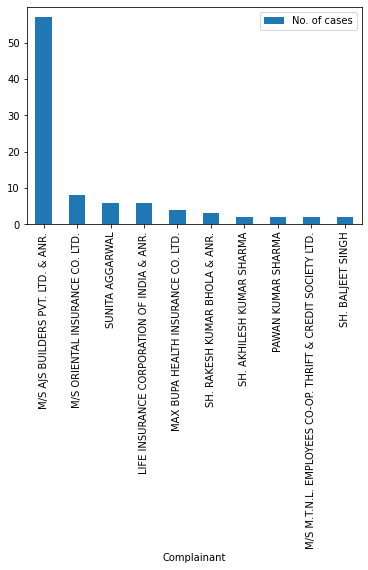

In [ ]:
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Complainant': com,
        'No. of cases': cases
       }
print(data)
df = pd.DataFrame(data,columns=['Complainant','No. of cases'])
df.plot(x ='Complainant', y='No. of cases', kind = 'bar')
#plt.show()

In [ ]:
choices = df_KA['Complainant']
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)


[['Smt.Aruna.K.B.', 38], ['Maxworth Realty India Ltd', 31], ['HDFC ERGO General Insurance Co. Ltd.', 31], ['The Manager,', 31], ['M/s Balaji Builders & Developers', 21], ['AIC of India', 21], ['Agriculture Insurance Com of India Ltd', 19], ['M/s AMR Housing Development Corporation', 13], ['The Chairman', 11], ['M/s Sri Venkateswara Estates & Buildes', 8]]


['Smt.Aruna.K.B.', 'Maxworth Realty India Ltd', 'HDFC ERGO General Insurance Co. Ltd.', 'The Manager,', 'M/s Balaji Builders & Developers', 'AIC of India', 'Agriculture Insurance Com of India Ltd', 'M/s AMR Housing Development Corporation', 'The Chairman', 'M/s Sri Venkateswara Estates & Buildes']
[38, 31, 31, 31, 21, 21, 19, 13, 11, 8]
{'Complainant': ['Smt.Aruna.K.B.', 'Maxworth Realty India Ltd', 'HDFC ERGO General Insurance Co. Ltd.', 'The Manager,', 'M/s Balaji Builders & Developers', 'AIC of India', 'Agriculture Insurance Com of India Ltd', 'M/s AMR Housing Development Corporation', 'The Chairman', 'M/s Sri Venkateswara Estates & Buildes'], 'No. of cases': [38, 31, 31, 31, 21, 21, 19, 13, 11, 8]}


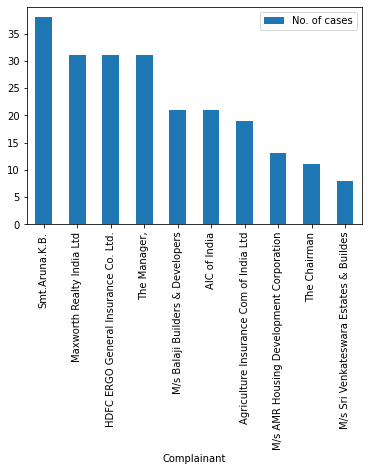

In [ ]:
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Complainant': com,
        'No. of cases': cases
       }
print(data)
df = pd.DataFrame(data,columns=['Complainant','No. of cases'])
df.plot(x ='Complainant', y='No. of cases', kind = 'bar')
#plt.show()

In [ ]:
choices = df_MH['Complainant']
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)


[['MR.SURAJ MOTILAL GUPTA AND ANR', 20], ['BHARTI AXA GENERAL INSURANCE CO.LTD.', 13], ['M/S.KUSHI DEVELOPERS PVT.LTD.THROUGH ITS DIRECTOR SMT.SUJATA R.NIKALJI', 13], ['M/S.LAKSHMI DEVELOPERS THROUGH MR.BHIM A.MHATRE', 12], ['AMAR ASHA CHS.LTD. THROUGH PRESIDENT SMT.CHAYA H.BHIVGADE', 11], ['SHRI MANOJ M. CHOUDHARI', 10], ['M/S.ATALANTA BUILDERS & DEVELOPERS, THRU ITS. PARTNER. MR.SHISHIR SHIVAPURKAR & ORS', 8], ['RELIANCE GENERAL INSURANCE COM.LTD.', 7], ['SHREE KRISHNA CONSTRUCTIONS THROUGH PARTNER MR.SHRICHAND G.NAGDEV AND ORS', 7], ['MR.VIJAY SHINDE AND ANR', 7]]


['MR.SURAJ MOTILAL GUPTA AND ANR', 'BHARTI AXA GENERAL INSURANCE CO.LTD.', 'M/S.KUSHI DEVELOPERS PVT.LTD.THROUGH ITS DIRECTOR SMT.SUJATA R.NIKALJI', 'M/S.LAKSHMI DEVELOPERS THROUGH MR.BHIM A.MHATRE', 'AMAR ASHA CHS.LTD. THROUGH PRESIDENT SMT.CHAYA H.BHIVGADE', 'SHRI MANOJ M. CHOUDHARI', 'M/S.ATALANTA BUILDERS & DEVELOPERS, THRU ITS. PARTNER. MR.SHISHIR SHIVAPURKAR & ORS', 'RELIANCE GENERAL INSURANCE COM.LTD.', 'SHREE KRISHNA CONSTRUCTIONS THROUGH PARTNER MR.SHRICHAND G.NAGDEV AND ORS', 'MR.VIJAY SHINDE AND ANR']
[20, 13, 13, 12, 11, 10, 8, 7, 7, 7]
{'Complainant': ['MR.SURAJ MOTILAL GUPTA AND ANR', 'BHARTI AXA GENERAL INSURANCE CO.LTD.', 'M/S.KUSHI DEVELOPERS PVT.LTD.THROUGH ITS DIRECTOR SMT.SUJATA R.NIKALJI', 'M/S.LAKSHMI DEVELOPERS THROUGH MR.BHIM A.MHATRE', 'AMAR ASHA CHS.LTD. THROUGH PRESIDENT SMT.CHAYA H.BHIVGADE', 'SHRI MANOJ M. CHOUDHARI', 'M/S.ATALANTA BUILDERS & DEVELOPERS, THRU ITS. PARTNER. MR.SHISHIR SHIVAPURKAR & ORS', 'RELIANCE GENERAL INSURANCE COM.LTD.', 'SHREE KRISHNA 

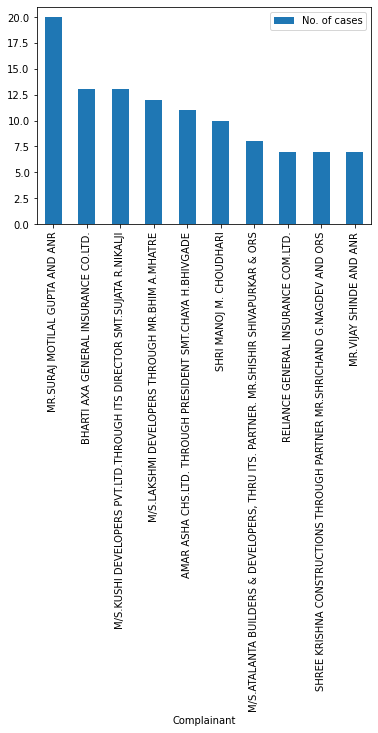

In [ ]:
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Complainant': com,
        'No. of cases': cases
       }
print(data)
df = pd.DataFrame(data,columns=['Complainant','No. of cases'])
df.plot(x ='Complainant', y='No. of cases', kind = 'bar')
#plt.show()

In [ ]:
choices = df_TN['Complainant']
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)


[['S.Jayaraman ,', 12], ['The Managing Director,', 2], ['1.The Oriental Insurance Co.Ltd.,', 2], ['M.Subramanian, S/o Manavalan, Thoppudurai, Vedaranyam Taluk, Nagapattinam District.', 2], ['The Secretary,', 2], ['S. Shanmuga Sundaram,', 1], ['Dr. S.V. Soundararajan,', 1], ['Smt. Amirtham,', 1], ['Yoganandan jagannathan,', 1], ['M/s. Deccan Estates Ltd.,', 1]]


['S.Jayaraman ,', 'The Managing Director,', '1.The Oriental Insurance Co.Ltd.,', 'M.Subramanian, S/o Manavalan, Thoppudurai, Vedaranyam Taluk, Nagapattinam District.', 'The Secretary,', 'S. Shanmuga Sundaram,', 'Dr. S.V. Soundararajan,', 'Smt. Amirtham,', 'Yoganandan jagannathan,', 'M/s. Deccan Estates Ltd.,']
[12, 2, 2, 2, 2, 1, 1, 1, 1, 1]


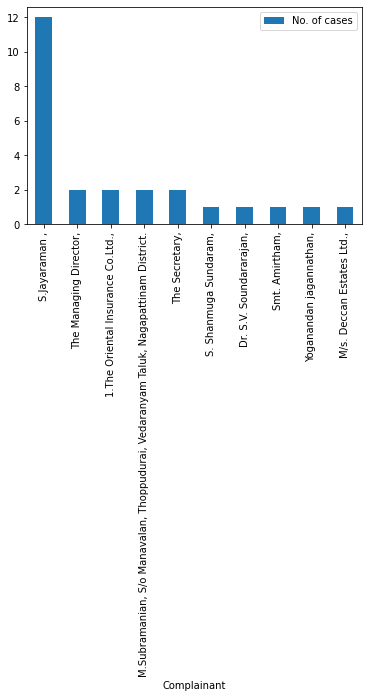

In [ ]:
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Complainant': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Complainant','No. of cases'])
df.plot(x ='Complainant', y='No. of cases', kind = 'bar')
#plt.show()

In [ ]:
choices = df_TG['Complainant']
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)


[['Jitendra Jain', 36], ['Oriental Insurance Co. Ltd.,', 26], ['M/s. Narne Constructions Pvt Ltd.,', 25], ['1.Meeta Jain', 19], ['Nisaruddin Ahmed Jeddy', 9], ['M/s. Country Club & Country Vacations,', 7], ['1.Asst.Engineer, TSNPDCL', 5], ['United India Insurance Co. Ltd.,', 5], ['1. Smt. Maduri Satya Laxmi', 4], ['1.State Bank of India,', 4]]


['Jitendra Jain', 'Oriental Insurance Co. Ltd.,', 'M/s. Narne Constructions Pvt Ltd.,', '1.Meeta Jain', 'Nisaruddin Ahmed Jeddy', 'M/s. Country Club & Country Vacations,', '1.Asst.Engineer, TSNPDCL', 'United India Insurance Co. Ltd.,', '1. Smt. Maduri Satya Laxmi', '1.State Bank of India,']
[36, 26, 25, 19, 9, 7, 5, 5, 4, 4]


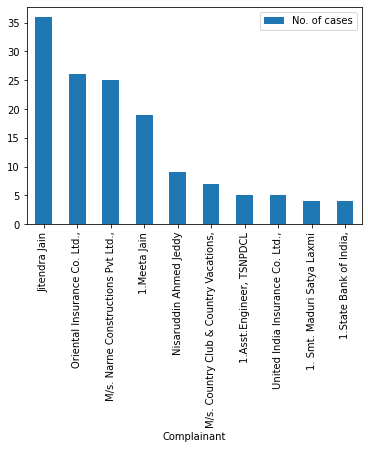

In [ ]:
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Complainant': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Complainant','No. of cases'])
df.plot(x ='Complainant', y='No. of cases', kind = 'bar')
#plt.show()

In [ ]:
choices = df_UP['Complainant']
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)


[['L .I. C. of India', 75], ['N I Co. Ltd.', 51], ['Sriram General Insurance Co. Ltd', 31], ['Pachimanchal Vidyut Vitran nigam Ltd', 31], ['Reliance Life Insurance Co. Ltd', 24], ['O I Co', 21], ['Oriental Insurance Company', 18], ['Ghaziabad Development Authority', 16], ['Lucknow Vikas Pradhikaran', 16], ['The New India Assurance co. Ltd.', 14]]


['L .I. C. of India', 'N I Co. Ltd.', 'Sriram General Insurance Co. Ltd', 'Pachimanchal Vidyut Vitran nigam Ltd', 'Reliance Life Insurance Co. Ltd', 'O I Co', 'Oriental Insurance Company', 'Ghaziabad Development Authority', 'Lucknow Vikas Pradhikaran', 'The New India Assurance co. Ltd.']
[75, 51, 31, 31, 24, 21, 18, 16, 16, 14]


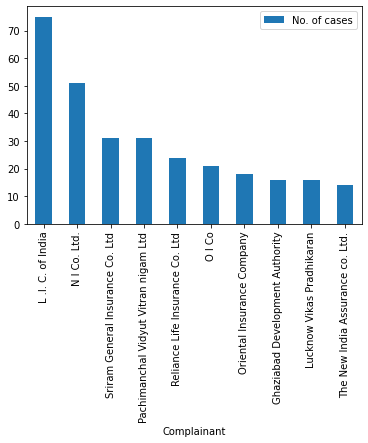

In [ ]:
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Complainant': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Complainant','No. of cases'])
df.plot(x ='Complainant', y='No. of cases', kind = 'bar')
#plt.show()

[['Sri Ram Chandra Shaw, Sole Proprietor M/s. Sarada Construction', 12], ['Maa Tara Construction & Others', 9], ['M/s. Om Construction & Another', 9], ['Sanjay Shaw alias Sanjay Kumar Shaw', 9], ['Sri Bhaskar Chakraborty & Ors.', 8], ['M/s. Neo Built Infrastructure Pvt. Ltd. & Anr.', 8], ['The Manager, State Bank of India', 7], ['Sunny Rock Estates and Developers Pvt. Ltd.', 6], ['Smt. Susmita Chakraborty', 6], ['Sri Samir Das', 6]]
['Sri Ram Chandra Shaw, Sole Proprietor M/s. Sarada Construction', 'Maa Tara Construction & Others', 'M/s. Om Construction & Another', 'Sanjay Shaw alias Sanjay Kumar Shaw', 'Sri Bhaskar Chakraborty & Ors.', 'M/s. Neo Built Infrastructure Pvt. Ltd. & Anr.', 'The Manager, State Bank of India', 'Sunny Rock Estates and Developers Pvt. Ltd.', 'Smt. Susmita Chakraborty', 'Sri Samir Das']
[12, 9, 9, 9, 8, 8, 7, 6, 6, 6]


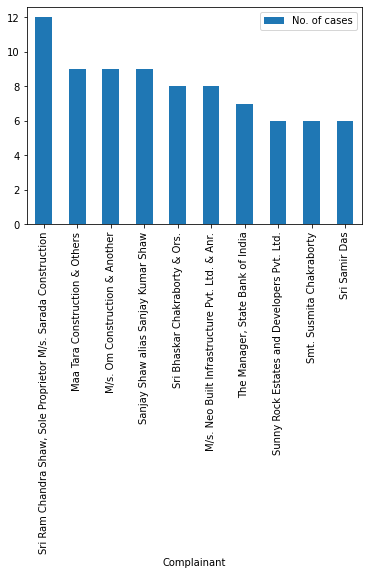

In [ ]:
choices = df_WB['Complainant']
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]

print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Complainant': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Complainant','No. of cases'])
df.plot(x ='Complainant', y='No. of cases', kind = 'bar')
#plt.show()

[['DDA', 44], ['ORIENTAL INSURANCE CO. LTD. & ANR.', 17], ['PAREENA INFRASTRUCTURE PVT. LTD.', 10], ['M/S GODREJ & BOYCE MFG. COMPANY LTD.', 8], ['M/S AVIVA LIFE INSURANCE CO. INDIA LTD.', 7], ['M/S ANSAL PROPERTIES & INFRASTRUCTURE LTD. & ANR.', 7], ['JET AIRWAYS (INDIA) LMT', 6], ['M/S PARSVNATH DEVELOPERS LTD.', 6], ['REKHA JAIN', 6], ['MANAGER (ICICI BANK)', 4]]
['DDA', 'ORIENTAL INSURANCE CO. LTD. & ANR.', 'PAREENA INFRASTRUCTURE PVT. LTD.', 'M/S GODREJ & BOYCE MFG. COMPANY LTD.', 'M/S AVIVA LIFE INSURANCE CO. INDIA LTD.', 'M/S ANSAL PROPERTIES & INFRASTRUCTURE LTD. & ANR.', 'JET AIRWAYS (INDIA) LMT', 'M/S PARSVNATH DEVELOPERS LTD.', 'REKHA JAIN', 'MANAGER (ICICI BANK)']
[44, 17, 10, 8, 7, 7, 6, 6, 6, 4]


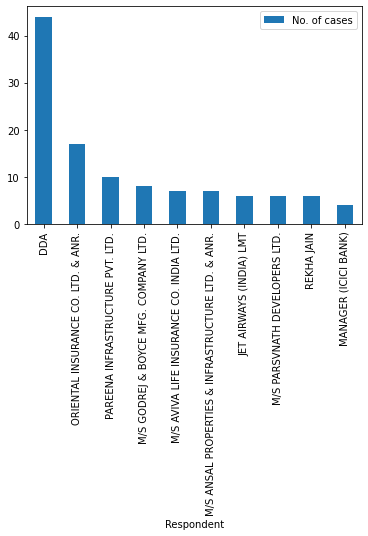

In [ ]:
choices = df_DL['Respondent']
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Respondent': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Respondent','No. of cases'])
df.plot(x ='Respondent', y='No. of cases', kind = 'bar')
#plt.show()

[['Corporation Bank', 53], ['M/s Kuber Developers', 45], ['H.T.Ramakrishna', 15], ['The General Manager', 8], ['The Branch Manager', 8], ['Smt.Manjula', 5], ['Kumar.M.K.', 5], ['M/s Dreamz Infra India Ltd', 5], ['Maxworth Realty India Ltd.', 5], ['The Director', 4]]
['Corporation Bank', 'M/s Kuber Developers', 'H.T.Ramakrishna', 'The General Manager', 'The Branch Manager', 'Smt.Manjula', 'Kumar.M.K.', 'M/s Dreamz Infra India Ltd', 'Maxworth Realty India Ltd.', 'The Director']
[53, 45, 15, 8, 8, 5, 5, 5, 5, 4]


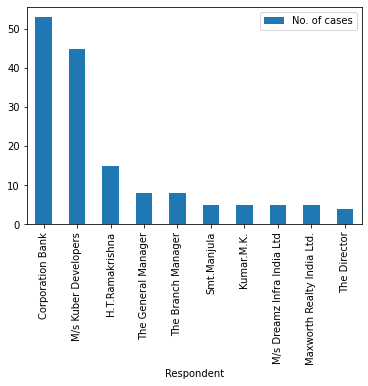

In [ ]:
choices = df_KA['Respondent']
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Respondent': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Respondent','No. of cases'])
df.plot(x ='Respondent', y='No. of cases', kind = 'bar')
#plt.show()

[['VED SHLOK Through its Partners', 36], ['SHANTA MANGESH DEVELOPERS PVT.LTD.THROUGH DIRECTOR MR.VIJAY S.MALLYA AND ANR', 18], ['Dharmesh Constructions Pvt. Ltd', 10], ['ICICI BANK LTD.AND ORS', 10], ['SAIKALP ENTERPRISES Through MR. GIRISH P. PANCHAL', 10], ['AUM ASSOCIATES THROUGH PARTNER MR.YUNUS ZAVERI AND ORS', 6], ['M/S.RAJESH G.GHARAT INFRA PVT.LTD.THROUGH IS DIRECTOR MR.RAJESH G.GHARAT', 6], ['M/s Zenal Construction Private Ltd', 6], ['The State of Maharashtra through The Collector, Sangli etc.', 6], ['M/S.AUM CONSTRUCTION MANAGEMENT SERVICE PVT.LTD.THROUGH MR.KISHORE S.SHETH AND ORS', 5]]
['VED SHLOK Through its Partners', 'SHANTA MANGESH DEVELOPERS PVT.LTD.THROUGH DIRECTOR MR.VIJAY S.MALLYA AND ANR', 'Dharmesh Constructions Pvt. Ltd', 'ICICI BANK LTD.AND ORS', 'SAIKALP ENTERPRISES Through MR. GIRISH P. PANCHAL', 'AUM ASSOCIATES THROUGH PARTNER MR.YUNUS ZAVERI AND ORS', 'M/S.RAJESH G.GHARAT INFRA PVT.LTD.THROUGH IS DIRECTOR MR.RAJESH G.GHARAT', 'M/s Zenal Construction Private 

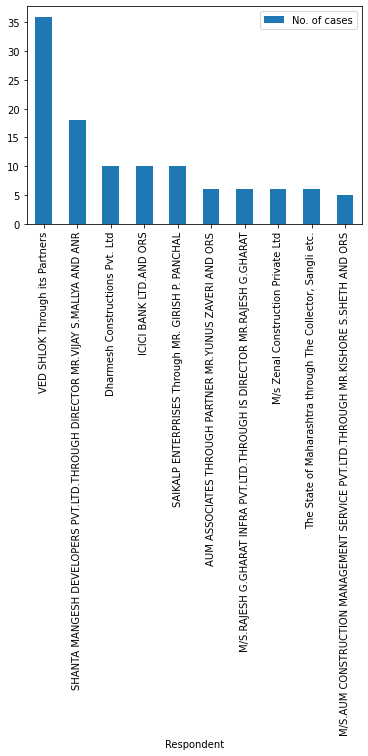

In [ ]:
choices = df_MH['Respondent']
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Respondent': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Respondent','No. of cases'])
df.plot(x ='Respondent', y='No. of cases', kind = 'bar')
#plt.show()

[['1.The Propreitor , Pazhamudhir Nilaiyam , And Another', 5], ['1. The Propreitor , Sri Kannan Departmental Store (P)Limited , And Another', 2], ['Er. G. Arumugam, D.C.E., Asian Builders,', 2], ['1.The Manager, The Karur Vysya Bank Limited, Chennai Royapuram, G.A.Road, Old Washarmentpet, Royapuram, Chennai , Tamilnadu 600 021.And Another', 2], ['1.The Proprietor, Pazhamuthir Nilayam, 736, Avinashi RToad, Kovai 641 018. And Another', 2], ['1.The Proprietor , Gokulam Bus Service ,', 2], ['State Bank of India', 2], ['Manohar Krishnan,', 1], ['1.T.Thirupathi, Proprietor', 1], ['1.The Sectary, No.6 Vedharanyam Taluk, Government Servants, Co-operative Thriff and Credit Society ltd. Vedharanyam, Nagapattinam District. And 2 Others', 1]]
['1.The Propreitor , Pazhamudhir Nilaiyam , And Another', '1. The Propreitor , Sri Kannan Departmental Store (P)Limited , And Another', 'Er. G. Arumugam, D.C.E., Asian Builders,', '1.The Manager, The Karur Vysya Bank Limited, Chennai Royapuram, G.A.Road, Old 

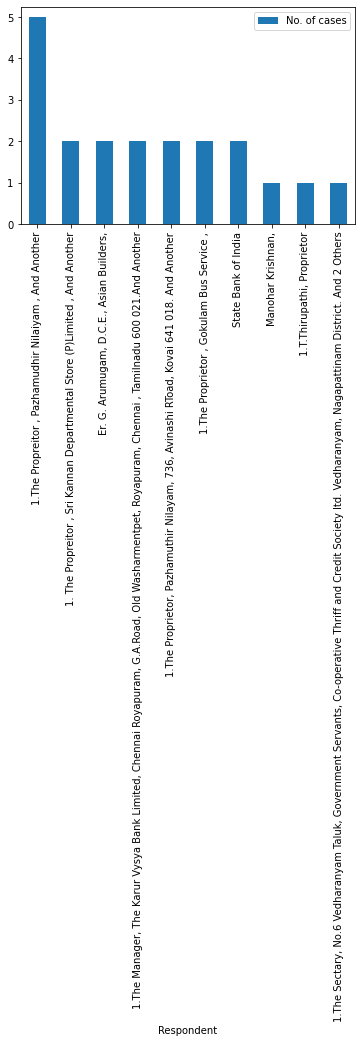

In [ ]:
choices = df_TN['Respondent']
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Respondent': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Respondent','No. of cases'])
df.plot(x ='Respondent', y='No. of cases', kind = 'bar')
#plt.show()

[['1.The Manager, micro Insurance Department,', 83], ['1.Bharti Airtel Ltd.,', 21], ['1)\tThe Branch Manager, Life Insurance Corporation of India,', 14], ['1.Chief General manager, Bharat Sanchar Bhavan ,', 11], ['M/s. DLF Gayatri Developers', 10], ['Pothani Bhoomaiah', 9], ['1.M/s. Alchemist Township India Ltd.,', 9], ['P. laxman Kumar', 9], ['P. Ravikumar', 6], ['1.Reliance Jio Infocomm Ltd.,', 6]]
['1.The Manager, micro Insurance Department,', '1.Bharti Airtel Ltd.,', '1)\tThe Branch Manager, Life Insurance Corporation of India,', '1.Chief General manager, Bharat Sanchar Bhavan ,', 'M/s. DLF Gayatri Developers', 'Pothani Bhoomaiah', '1.M/s. Alchemist Township India Ltd.,', 'P. laxman Kumar', 'P. Ravikumar', '1.Reliance Jio Infocomm Ltd.,']
[83, 21, 14, 11, 10, 9, 9, 9, 6, 6]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


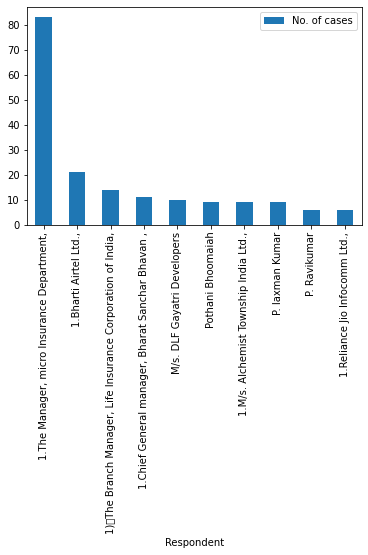

In [ ]:
choices = df_TG['Respondent']
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Respondent': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Respondent','No. of cases'])
df.plot(x ='Respondent', y='No. of cases', kind = 'bar')
#plt.show()

[['KDP Infrastricture Pvt Ltd', 19], ['Bharti AXA General Insurance Co. Ltd', 17], ['U.I.I.Co. Ltd', 17], ['Gorakhpur Development Authority', 16], ['M/S Morpheus Developers Pvt Ltd', 14], ['Ansal Properties and Infracture Ltd', 13], ['Aviva Life Insurance', 12], ['U.P.P.C.L.', 12], ['Divisional Manager (C.R.M.) L I C Of India', 11], ['Oriental Insurance Co', 10]]
['KDP Infrastricture Pvt Ltd', 'Bharti AXA General Insurance Co. Ltd', 'U.I.I.Co. Ltd', 'Gorakhpur Development Authority', 'M/S Morpheus Developers Pvt Ltd', 'Ansal Properties and Infracture Ltd', 'Aviva Life Insurance', 'U.P.P.C.L.', 'Divisional Manager (C.R.M.) L I C Of India', 'Oriental Insurance Co']
[19, 17, 17, 16, 14, 13, 12, 12, 11, 10]


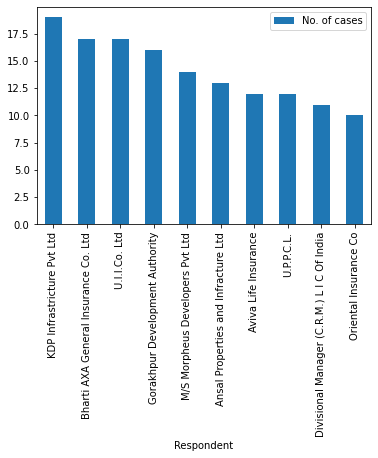

In [ ]:
choices = df_UP['Respondent']
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Respondent': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Respondent','No. of cases'])
df.plot(x ='Respondent', y='No. of cases', kind = 'bar')
#plt.show()

[['M/s. Millennium India Construction & Ors.', 34], ['M/s. Biswas Construction & Others', 15], ['M/s. S. S. Enterprise', 14], ['M/s Arunima Construction', 11], ['State Bank of India & Another', 10], ['M/s. Bengal Shelter Housing Development Ltd.', 9], ['Sri Srijit Banerjee & Others', 8], ['M/S Dharitri InfravenTure Pvt. Ltd.', 8], ['M/S Nobel Udyog', 8], ['Aditya Mukherjee', 8]]
['M/s. Millennium India Construction & Ors.', 'M/s. Biswas Construction & Others', 'M/s. S. S. Enterprise', 'M/s Arunima Construction', 'State Bank of India & Another', 'M/s. Bengal Shelter Housing Development Ltd.', 'Sri Srijit Banerjee & Others', 'M/S Dharitri InfravenTure Pvt. Ltd.', 'M/S Nobel Udyog', 'Aditya Mukherjee']
[34, 15, 14, 11, 10, 9, 8, 8, 8, 8]


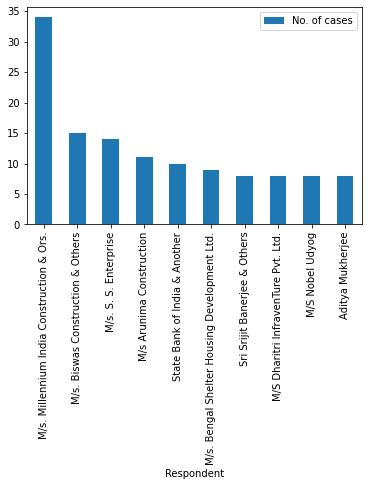

In [ ]:
choices = df_WB['Respondent']
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Respondent': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Respondent','No. of cases'])
df.plot(x ='Respondent', y='No. of cases', kind = 'bar')
#plt.show()

[['VINAY KUMAR DUBEY', 57], ['NIKHIL SINGH', 31], ['SEEMA GUPTA', 9], ['MAHUA KALRA', 6], ['ANKUR GOEL', 5], ['V.K. SHARMA', 4], ['KRISHNA KUMAR SHARMA', 3], ['SUNDER SINGH', 3], ['SELF', 2], ['ABHINAV SHARMA', 2]]
['VINAY KUMAR DUBEY', 'NIKHIL SINGH', 'SEEMA GUPTA', 'MAHUA KALRA', 'ANKUR GOEL', 'V.K. SHARMA', 'KRISHNA KUMAR SHARMA', 'SUNDER SINGH', 'SELF', 'ABHINAV SHARMA']
[57, 31, 9, 6, 5, 4, 3, 3, 2, 2]


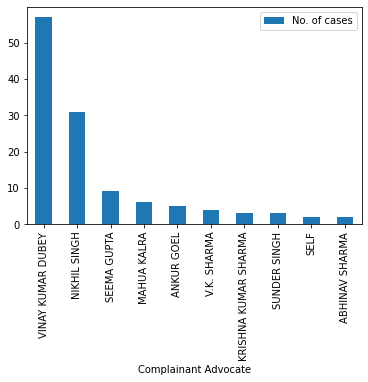

In [ ]:
choices = df_DL['Complainant Advocate']
choices=choices.dropna()
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Complainant Advocate': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Complainant Advocate','No. of cases'])
df.plot(x ='Complainant Advocate', y='No. of cases', kind = 'bar')
#plt.show()

[['Prashanth.T.Pandit', 52], ['B.S.Ravi Kiran', 45], ['B.C.Shivanne Gowda', 43], ['N.J.Ramesh', 40], ['Subramani.K.V.', 19], ['Party Inperson', 14], ['Shankar Gulli', 11], ['Mohan Malge', 11], ['Kumar.A.Patil', 11], ['Malatesh.S.R.', 10]]
['Prashanth.T.Pandit', 'B.S.Ravi Kiran', 'B.C.Shivanne Gowda', 'N.J.Ramesh', 'Subramani.K.V.', 'Party Inperson', 'Shankar Gulli', 'Mohan Malge', 'Kumar.A.Patil', 'Malatesh.S.R.']
[52, 45, 43, 40, 19, 14, 11, 11, 11, 10]


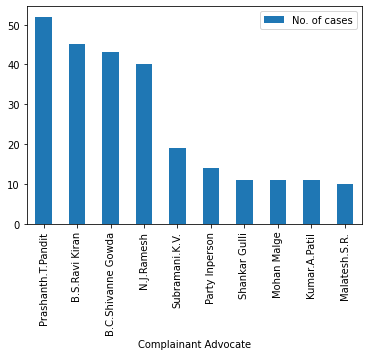

In [ ]:
choices = df_KA['Complainant Advocate']
choices=choices.dropna()
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Complainant Advocate': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Complainant Advocate','No. of cases'])
df.plot(x ='Complainant Advocate', y='No. of cases', kind = 'bar')
#plt.show()

[['ADV.MANINDRA PANDEY', 51], ['IN PERSON', 32], ['ADV.K.PATIL', 29], ['ADV.P.MAKHIJANI', 26], ['ADV.DIGAMBER THAKARE', 22], ['ADV.WAVIKAR', 21], ['ADV.G.V.SOLANKE', 21], ['ADV.KINALEKAR', 16], ['ADV.THAKUR', 15], ['ADV.A.PAWAR', 13]]
['ADV.MANINDRA PANDEY', 'IN PERSON', 'ADV.K.PATIL', 'ADV.P.MAKHIJANI', 'ADV.DIGAMBER THAKARE', 'ADV.WAVIKAR', 'ADV.G.V.SOLANKE', 'ADV.KINALEKAR', 'ADV.THAKUR', 'ADV.A.PAWAR']
[51, 32, 29, 26, 22, 21, 21, 16, 15, 13]


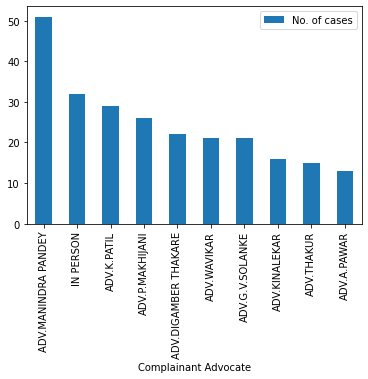

In [ ]:
choices = df_MH['Complainant Advocate']
choices=choices.dropna()
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Complainant Advocate': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Complainant Advocate','No. of cases'])
df.plot(x ='Complainant Advocate', y='No. of cases', kind = 'bar')
#plt.show()

[['PARTY IN PERSON', 18], ['M/s.K.Ravikumar', 2], ['M/s.Nageshwaran & Narichania', 1], ['M/s.S.Parthasarathy', 1], ['Mr. K.R. Pughazhendhi', 1], ['M/s. M.Y. Mohamed Yusuf', 1], ['M/s. T. Ravi Kumar', 1], ['M/s. M. Sundar', 1], ['M/s.K.Jothisivam', 1], ['M/s. V. Ramana Reddy', 1]]
['PARTY IN PERSON', 'M/s.K.Ravikumar', 'M/s.Nageshwaran & Narichania', 'M/s.S.Parthasarathy', 'Mr. K.R. Pughazhendhi', 'M/s. M.Y. Mohamed Yusuf', 'M/s. T. Ravi Kumar', 'M/s. M. Sundar', 'M/s.K.Jothisivam', 'M/s. V. Ramana Reddy']
[18, 2, 1, 1, 1, 1, 1, 1, 1, 1]


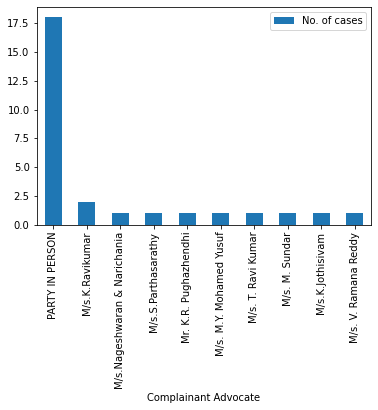

In [ ]:
choices = df_TN['Complainant Advocate']
choices=choices.dropna()
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] > 80]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Complainant Advocate': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Complainant Advocate','No. of cases'])
df.plot(x ='Complainant Advocate', y='No. of cases', kind = 'bar')
#plt.show()

[['Kunamalla Karunakar', 82], ['M/s . Jitendra Jain', 49], ['M/s. K.N.V. Radha Krishna', 24], ['K.Krishna Murthy(PIP)', 23], ['M/s. Gopi Rajesh & Associates', 20], ['M/s. Nisaruddin Ahmed Jeddy', 15], ['M/s. V. Gouri Sankara Rao', 13], ['M/s. K.HANUMANTH RAO', 10], ['M/s. Deepak Chowdary', 9], ['Mr. Raja Sripathi Rao', 8]]
['Kunamalla Karunakar', 'M/s . Jitendra Jain', 'M/s. K.N.V. Radha Krishna', 'K.Krishna Murthy(PIP)', 'M/s. Gopi Rajesh & Associates', 'M/s. Nisaruddin Ahmed Jeddy', 'M/s. V. Gouri Sankara Rao', 'M/s. K.HANUMANTH RAO', 'M/s. Deepak Chowdary', 'Mr. Raja Sripathi Rao']
[82, 49, 24, 23, 20, 15, 13, 10, 9, 8]


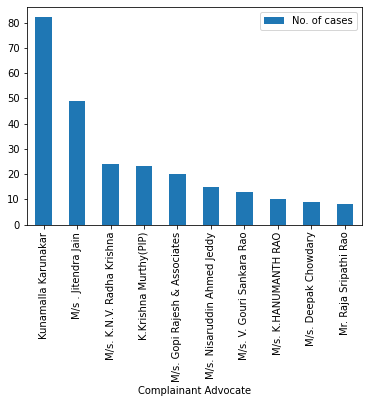

In [ ]:
choices = df_TG['Complainant Advocate']
choices=choices.dropna()
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] >85]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Complainant Advocate': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Complainant Advocate','No. of cases'])
df.plot(x ='Complainant Advocate', y='No. of cases', kind = 'bar')
#plt.show()

[['Isar Husain', 44], ['Sarvesh Kumar Sharma', 35], ['V.S. Bisaria', 35], ['Anil Kumar Mishra', 30], ['Naveen Kumar Tewari', 29], ['Self', 26], ['Sanjay Jaiswal', 25], ['S.N. Tiwari', 24], ['R K Mishra', 22], ['Tara Gupta', 22]]
['Isar Husain', 'Sarvesh Kumar Sharma', 'V.S. Bisaria', 'Anil Kumar Mishra', 'Naveen Kumar Tewari', 'Self', 'Sanjay Jaiswal', 'S.N. Tiwari', 'R K Mishra', 'Tara Gupta']
[44, 35, 35, 30, 29, 26, 25, 24, 22, 22]


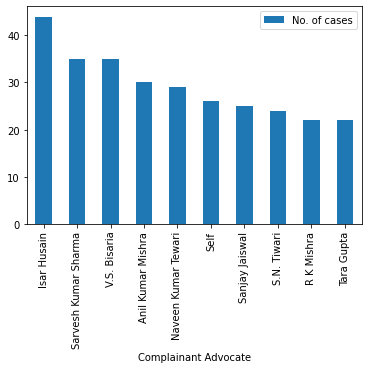

In [ ]:
choices = df_UP['Complainant Advocate']
choices=choices.dropna()
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] >85]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Complainant Advocate': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Complainant Advocate','No. of cases'])
df.plot(x ='Complainant Advocate', y='No. of cases', kind = 'bar')
#plt.show()

[['Mr. Barun Prasad, Mr. Subrata Mondal, Mr. Sovanlal Bera, Mr. P. K. Majumder', 44], ['Mr. Prasanta Banerjee', 27], ['In-person', 19], ['Mr. Amarnath Sanyal', 19], ['Ms. Mousumi Chakraborty', 18], ['Mr. Abhijit Bhuina', 14], ['Mr. Abhik Das. Mrs. Koyeli Mukhopadhyay', 11], ['Ms. Tanusree Dhar', 11], ['Mr. Tarun Jyoti Banerjee, Shamim Ahmed', 10], ['Mr. Prasant Agarwal. Ms. Sanhita Shaoo, Ms. Asha Ghosh', 9]]
['Mr. Barun Prasad, Mr. Subrata Mondal, Mr. Sovanlal Bera, Mr. P. K. Majumder', 'Mr. Prasanta Banerjee', 'In-person', 'Mr. Amarnath Sanyal', 'Ms. Mousumi Chakraborty', 'Mr. Abhijit Bhuina', 'Mr. Abhik Das. Mrs. Koyeli Mukhopadhyay', 'Ms. Tanusree Dhar', 'Mr. Tarun Jyoti Banerjee, Shamim Ahmed', 'Mr. Prasant Agarwal. Ms. Sanhita Shaoo, Ms. Asha Ghosh']
[44, 27, 19, 19, 18, 14, 11, 11, 10, 9]


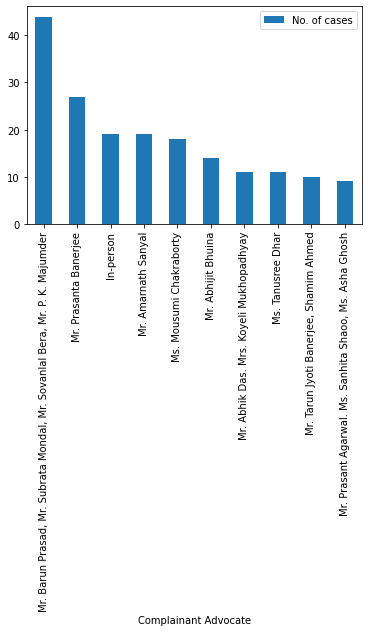

In [ ]:
choices = df_WB['Complainant Advocate']
choices=choices.dropna()
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] >85]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Complainant Advocate': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Complainant Advocate','No. of cases'])
df.plot(x ='Complainant Advocate', y='No. of cases', kind = 'bar')
#plt.show()

[['I & III svd, II N R', 2], ['inperson', 1], ['Abhinav R', 1], ['V.P.L', 1], ['ARV', 1], ['M.G.S', 1], ['Reshma Thammaiah-1 & Ravi Ravi-2', 1], ['I.P(Kulkarni-1-3)', 1], ['Bopanna K', 1], ['Narendra Dev', 1]]
['I & III svd, II N R', 'inperson', 'Abhinav R', 'V.P.L', 'ARV', 'M.G.S', 'Reshma Thammaiah-1 & Ravi Ravi-2', 'I.P(Kulkarni-1-3)', 'Bopanna K', 'Narendra Dev']
[2, 1, 1, 1, 1, 1, 1, 1, 1, 1]


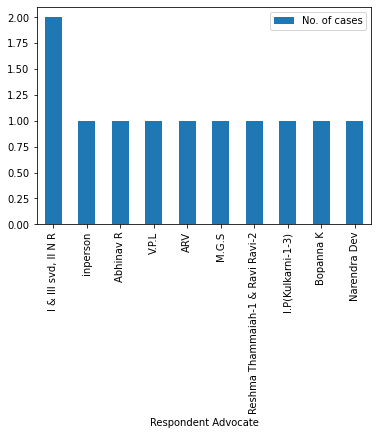

In [ ]:
choices = df_KA['Respondent Advocate']
choices=choices.dropna()
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] >85]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Respondent Advocate': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Respondent Advocate','No. of cases'])
df.plot(x ='Respondent Advocate', y='No. of cases', kind = 'bar')
#plt.show()

[['PIP', 4], ['B. Srinivas', 2], ['M/s. CCN Gandhi', 1], ['M/s. M. Hara Gopal rao', 1], ['P. Kameshwara Rao', 1], ['N.Amarnath', 1], ['M/s. K. Visweswara RAo', 1], ['M/s. Nelson Mathew', 1]]
['PIP', 'B. Srinivas', 'M/s. CCN Gandhi', 'M/s. M. Hara Gopal rao', 'P. Kameshwara Rao', 'N.Amarnath', 'M/s. K. Visweswara RAo', 'M/s. Nelson Mathew']
[4, 2, 1, 1, 1, 1, 1, 1]


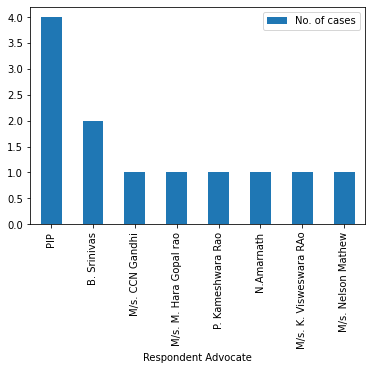

In [ ]:
choices = df_TG['Respondent Advocate']
choices=choices.dropna()
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] >85]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Respondent Advocate': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Respondent Advocate','No. of cases'])
df.plot(x ='Respondent Advocate', y='No. of cases', kind = 'bar')
#plt.show()

In [ ]:
choices = df_TN['Respondent Advocate']
choices=choices.dropna()
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] >85]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Respondent Advocate': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Respondent Advocate','No. of cases'])
df.plot(x ='Respondent Advocate', y='No. of cases', kind = 'bar')
#plt.show()

Streaming output truncated to the last 5000 lines.


[['Self', 24], ['Umesh Kumar Sharma', 17], ['No Advocate (OP)', 16], ['Sanjay Kumar Verma', 9], ['S.P.Pandey', 8], ['Pratul Pratap Singh Adeel Ahmad', 8], ['B.K. Upadhyay', 7], ['Mujeeb Effendi', 7], ['Muzeef Efendi', 6], ['Surangama Sharma Devesh Saxena', 5]]
['Self', 'Umesh Kumar Sharma', 'No Advocate (OP)', 'Sanjay Kumar Verma', 'S.P.Pandey', 'Pratul Pratap Singh Adeel Ahmad', 'B.K. Upadhyay', 'Mujeeb Effendi', 'Muzeef Efendi', 'Surangama Sharma Devesh Saxena']
[24, 17, 16, 9, 8, 8, 7, 7, 6, 5]


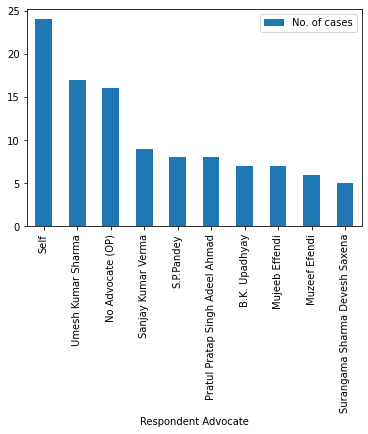

In [ ]:
choices = df_UP['Respondent Advocate']
choices=choices.dropna()
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] >85]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Respondent Advocate': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Respondent Advocate','No. of cases'])
df.plot(x ='Respondent Advocate', y='No. of cases', kind = 'bar')
#plt.show()

[['Mr. Barun Prasad', 21], ['Mr. Abhik Kr. Das', 15], ['Inperson/', 13], ['Ms. Tanusree Dhar', 9], ['Mr. Prabir Basu', 8], ['Ms. Binota Roy', 8], ['Ms. Madhumita Saha, Mr. Rajesh Biswas', 7], ['Mrs. Sanhita Shaoo', 7], ['Mr .T.J.Banerjee, Shamim Ahmed', 6], ['Mr. Prasanta Banerjee', 6]]
['Mr. Barun Prasad', 'Mr. Abhik Kr. Das', 'Inperson/', 'Ms. Tanusree Dhar', 'Mr. Prabir Basu', 'Ms. Binota Roy', 'Ms. Madhumita Saha, Mr. Rajesh Biswas', 'Mrs. Sanhita Shaoo', 'Mr .T.J.Banerjee, Shamim Ahmed', 'Mr. Prasanta Banerjee']
[21, 15, 13, 9, 8, 8, 7, 7, 6, 6]


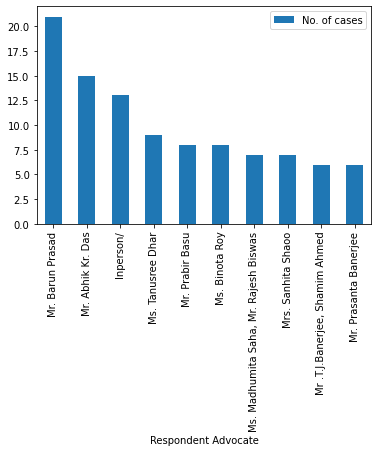

In [ ]:
choices = df_WB['Respondent Advocate']
choices=choices.dropna()
#print(choices)
choices_df = pd.DataFrame(choices)
#print(choices_df.iloc[219])
name=[]
count=[]
#print(delhi_complainants['Complainant'])
j=0
while(len(choices_df)!=0):
  possibilities = process.extract(choices_df.iloc[0][0], choices,limit=400,scorer=fuzz.token_set_ratio)
  temp=[possible for possible in possibilities if possible[1] >85]
  #print(temp)
  name.append(choices_df.iloc[0][0])
  temp_count=0
  for i in temp:
    temp_count+=1
    choices_df=choices_df.drop(i[2])
    choices=choices.drop(i[2])
  count.append(temp_count)
  j+=1

res=[]
for i in range(len(name)):
  res.append([name[i],count[i]])

res.sort(key=lambda x:x[1],reverse=True)
k=10
k=k if k<len(res) else len(res)
top10= res[0:k]
print(top10)
com = []
cases=[]
for i in range(len(top10)):
  com.append(top10[i][0])
  cases.append(top10[i][1])
print(com)
print(cases)
data = {'Respondent Advocate': com,
        'No. of cases': cases
       }
df = pd.DataFrame(data,columns=['Respondent Advocate','No. of cases'])
df.plot(x ='Respondent Advocate', y='No. of cases', kind = 'bar')
#plt.show()

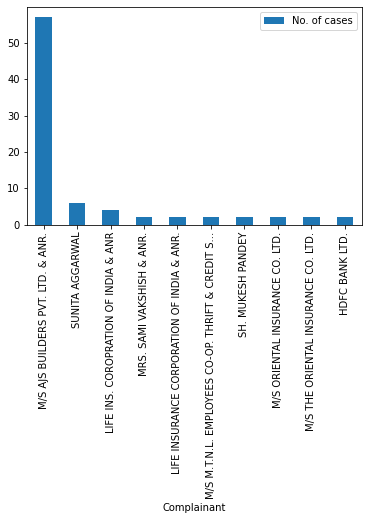

In [ ]:
data = {'Complainant': ['M/S AJS BUILDERS PVT. LTD. & ANR.','SUNITA AGGARWAL','LIFE INS. COROPRATION OF INDIA & ANR',
                        'MRS. SAMI VAKSHISH & ANR.',
                        'LIFE INSURANCE CORPORATION OF INDIA & ANR.','M/S M.T.N.L. EMPLOYEES CO-OP. THRIFT & CREDIT S...',
                        'SH. MUKESH PANDEY','M/S ORIENTAL INSURANCE CO. LTD.',
                        'M/S THE ORIENTAL INSURANCE CO. LTD.','HDFC BANK LTD.'],
        'No. of cases': [57,6,4,2,2,2,2,2,2,2]
       }
  
df = pd.DataFrame(data,columns=['Complainant','No. of cases'])
df.plot(x ='Complainant', y='No. of cases', kind = 'bar')
#plt.show()

In [ ]:
karnataka_complainants = df_KA.groupby('Complainant')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(karnataka_complainants)

                                                 Case No.
Complainant                                              
Smt.Aruna Nandagopal                                   37
The Manager                                            24
M/s Maxworth Realty India Ltd                          23
AIC of India                                           20
M/s Universal Sompo General Insurance Co Ltd           14
M/s AMR Housing Development Corporation                13
Agriculture Insurance Com of India Ltd                 10
Agriculture Insurance Company of India Limited,         9
Syed Nizam Ali                                          8
The Chairman                                            8


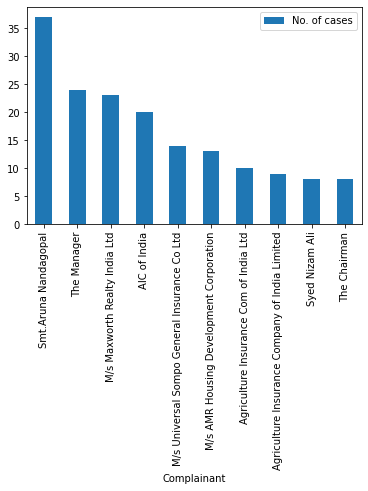

In [ ]:
data = {'Complainant': ['Smt.Aruna Nandagopal','The Manager','M/s Maxworth Realty India Ltd',
                        'AIC of India','M/s Universal Sompo General Insurance Co Ltd',
                        'M/s AMR Housing Development Corporation','Agriculture Insurance Com of India Ltd',
                        'Agriculture Insurance Company of India Limited','Syed Nizam Ali','The Chairman'],
        'No. of cases': [37,24,23,20,14,13,10,9,8,8]
       }
  
df = pd.DataFrame(data,columns=['Complainant','No. of cases'])
df.plot(x ='Complainant', y='No. of cases', kind = 'bar')
#plt.show()

In [ ]:
MH=df_MH.groupby('Complainant')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(MH)

                                                    Case No.
Complainant                                                 
MR.SURAJ MOTILAL GUPTA AND ANR                            19
M/S.KUSHI DEVELOPERS PVT.LTD.THROUGH ITS DIRECT...        13
M/S.LAKSHMI DEVELOPERS THROUGH MR.BHIM A.MHATRE           12
AMAR ASHA CHS.LTD. THROUGH PRESIDENT SMT.CHAYA ...        11
SHRI MANOJ M. CHOUDHARI                                   10
Mr Prakash Shankar Kore                                    7
SHRI.GANPAT S.JADHAV                                       6
SABRI ENTERPRISES THROUGH MR.HIREN BHARANI                 6
M/S SHALOM BUILDERS & DEVELOPERS                           6
SHREE KRISHNA CONSTRUCTIONS THROUGH PARTNER MR....         6


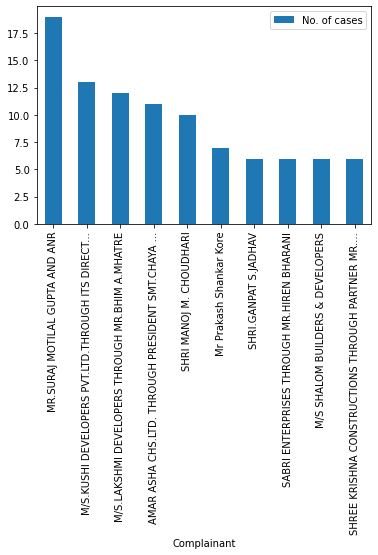

In [ ]:
data = {'Complainant': ['MR.SURAJ MOTILAL GUPTA AND ANR','M/S.KUSHI DEVELOPERS PVT.LTD.THROUGH ITS DIRECT...',
                        'M/S.LAKSHMI DEVELOPERS THROUGH MR.BHIM A.MHATRE',
                        'AMAR ASHA CHS.LTD. THROUGH PRESIDENT SMT.CHAYA ...','SHRI MANOJ M. CHOUDHARI',
                        'Mr Prakash Shankar Kore','SHRI.GANPAT S.JADHAV',
                        'SABRI ENTERPRISES THROUGH MR.HIREN BHARANI',
                        'M/S SHALOM BUILDERS & DEVELOPERS','SHREE KRISHNA CONSTRUCTIONS THROUGH PARTNER MR....'],
        'No. of cases': [19,13,12,11,10,7,6,6,6,6]
       }
  
df = pd.DataFrame(data,columns=['Complainant','No. of cases'])
df.plot(x ='Complainant', y='No. of cases', kind = 'bar')

In [ ]:
TN=df_TN.groupby('Complainant')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(TN)

                                                    Case No.
Complainant                                                 
S.Jayaraman ,                                              8
S.Jayaraman Age 71, S/o Shanmuga Nadar, 6/125, ...         2
1.The Manager, M/s. Cholamandalam Ms General In...         1
Ramesh Reddy,                                              1
S. Navarathanmal,                                          1
S. Shanmuga Sundaram,                                      1
S.JAYARAMAN,                                               1
S.Jayaraman , Age 71, S/o Shanmuga Nadar ,6/125...         1
S.Shanmuga Sundarm & S.S. Poorna Kumar                     1
S.Yasotha- Senior Citizen,                                 1


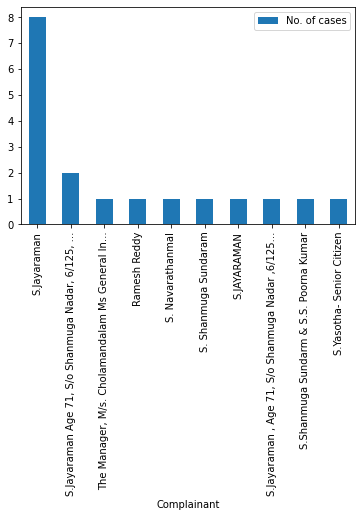

In [ ]:
data = {'Complainant': ['S.Jayaraman','S.Jayaraman Age 71, S/o Shanmuga Nadar, 6/125, ...',
                        'The Manager, M/s. Cholamandalam Ms General In...',
                        'Ramesh Reddy','S. Navarathanmal',
                        'S. Shanmuga Sundaram','S.JAYARAMAN',
                        'S.Jayaraman , Age 71, S/o Shanmuga Nadar ,6/125...',
                        'S.Shanmuga Sundarm & S.S. Poorna Kumar','S.Yasotha- Senior Citizen'],
        'No. of cases': [8,2,1,1,1,1,1,1,1,1]
       }
  
df = pd.DataFrame(data,columns=['Complainant','No. of cases'])
df.plot(x ='Complainant', y='No. of cases', kind = 'bar')

In [ ]:
TG=df_TG.groupby('Complainant')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(TG)

                              Case No.
Complainant                           
Oriental Insurance Co. Ltd.,        24
Jitendra Jain                       23
1.Meeta Jain                        11
1.Jitendra Jain                      9
M/s. Narne estates Pvt Ltd.,         7
M/s. JK Constructions                6
M/s. Narne Estates Pvt Ltd.,         4
Nisaruddin Ahmed Jeddy               4
T.Vijay Hanuman Singh                3
Meeta Jain                           3


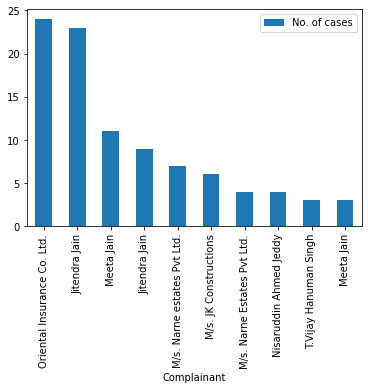

In [ ]:
data = {'Complainant': ['Oriental Insurance Co. Ltd.','Jitendra Jain',
                        'Meeta Jain',
                        'Jitendra Jain','M/s. Narne estates Pvt Ltd.',
                        'M/s. JK Constructions','M/s. Narne Estates Pvt Ltd.',
                        'Nisaruddin Ahmed Jeddy',
                        'T.Vijay Hanuman Singh','Meeta Jain'],
        'No. of cases': [24,23,11,9,7,6,4,4,3,3]
       }
  
df = pd.DataFrame(data,columns=['Complainant','No. of cases'])
df.plot(x ='Complainant', y='No. of cases', kind = 'bar')

In [ ]:
UP=df_UP.groupby('Complainant')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(UP)

                                                Case No.
Complainant                                             
L I C Of India                                        41
Ex.Engg. Dakshinanchal Vidyut Vitran Nigam Ltd        17
Lucknow Vikas Pradhikaran                             14
L I C                                                 13
The Oriental Insurance Co. Ltd                         9
O I Co                                                 9
U I I Co                                               7
National Insurance Co. Ltd                             7
Iffco Tokio General Insurance Co. Ltd                  7
United India Insurance Co. Ltd                         6


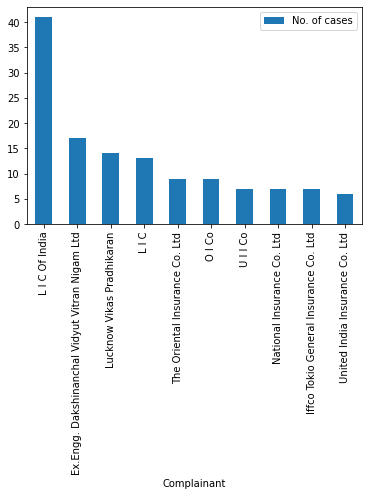

In [ ]:
data = {'Complainant': ['L I C Of India',
                        'Ex.Engg. Dakshinanchal Vidyut Vitran Nigam Ltd',
                        'Lucknow Vikas Pradhikaran',
                        'L I C',
                        'The Oriental Insurance Co. Ltd',
                        'O I Co',
                        'U I I Co',
                        'National Insurance Co. Ltd',
                        'Iffco Tokio General Insurance Co. Ltd',
                        'United India Insurance Co. Ltd'],
        'No. of cases': [41,17,14,13,9,9,7,7,7,6]
       }
  
df = pd.DataFrame(data,columns=['Complainant','No. of cases'])
df.plot(x ='Complainant', y='No. of cases', kind = 'bar')

In [ ]:
WB=df_WB.groupby('Complainant')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(WB)

                                                    Case No.
Complainant                                                 
Sanjay Shaw alias Sanjay Kumar Shaw                        9
M/s. Neo Built Infrastructure Pvt. Ltd. & Anr.             8
Prantik Agro (P) Ltd.                                      5
DDP Developers Pvt. Ltd. & Ors.                            5
DHFL Pramerica Life Insurance Co. Ltd.                     4
Tirthankar Dasgupta, retired Director, Geologic...         4
SRI SABIR PAILAN                                           4
Meghnad Saha Road Aahana Foundation                        4
Riverbank Developers Pvt. Ltd. & Another                   4
Dhimant Parekh                                             3


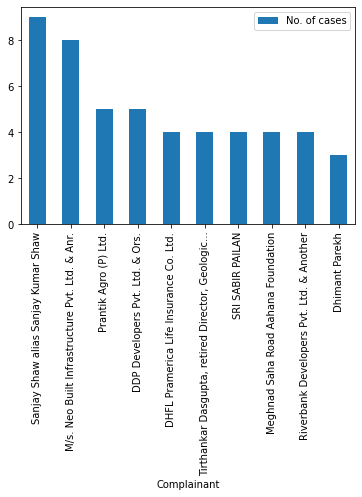

In [ ]:
data = {'Complainant': ['Sanjay Shaw alias Sanjay Kumar Shaw',
                        'M/s. Neo Built Infrastructure Pvt. Ltd. & Anr.',
                        'Prantik Agro (P) Ltd.',
                        'DDP Developers Pvt. Ltd. & Ors.',
                        'DHFL Pramerica Life Insurance Co. Ltd.',
                        'Tirthankar Dasgupta, retired Director, Geologic...',
                        'SRI SABIR PAILAN',
                        'Meghnad Saha Road Aahana Foundation',
                        'Riverbank Developers Pvt. Ltd. & Another',
                        'Dhimant Parekh'],
        'No. of cases': [9,8,5,5,4,4,4,4,4,3]
       }
  
df = pd.DataFrame(data,columns=['Complainant','No. of cases'])
df.plot(x ='Complainant', y='No. of cases', kind = 'bar')

In [ ]:
delhi_respondants = df_DL.groupby('Respondent')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(delhi_respondants)

                                            Case No.
Respondent                                          
DDA & ANR.                                        41
M/S GODREJ & BOYCE MFG. COMPANY LTD.               8
REKHA JAIN                                         6
JET AIRWAYS (INDIA) LMT                            6
M/S TDI INFRASTRUCTURE LTD.                        5
M/S ANSAL PROPERTIES & INFRASTRUCTURE LTD.         4
NATIONAL INSURANCE CO. LTD.                        4
M/S PARSVNATH DEVELOPERS LTD.                      3
DDA                                                3
M/S HINDUSTAN BUILDCON PVT. LTD.                   3


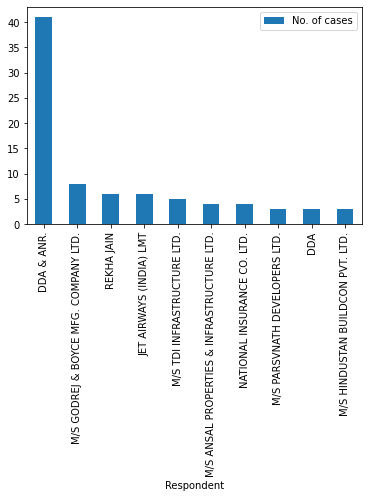

In [ ]:
data = {'Respondent': ['DDA & ANR.',
                        'M/S GODREJ & BOYCE MFG. COMPANY LTD.',
                        'REKHA JAIN',
                        'JET AIRWAYS (INDIA) LMT',
                        'M/S TDI INFRASTRUCTURE LTD.',
                        'M/S ANSAL PROPERTIES & INFRASTRUCTURE LTD.',
                        'NATIONAL INSURANCE CO. LTD.',
                        'M/S PARSVNATH DEVELOPERS LTD.',
                        'DDA',
                        'M/S HINDUSTAN BUILDCON PVT. LTD.'],
        'No. of cases': [41,8,6,6,5,4,4,3,3,3]
       }
  
df = pd.DataFrame(data,columns=['Respondent','No. of cases'])
df.plot(x ='Respondent', y='No. of cases', kind = 'bar')

In [ ]:
KA = df_KA.groupby('Respondent')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(KA)

                                      Case No.
Respondent                                    
M/s Trans City Developers                   41
Chanakya Finance Corporation                40
T.H.Ramakrishna                              7
The Branch Manager                           7
Hindustan Petroleum Corporation Ltd.         6
T.H.Ramakrishnan                             6
M/s Dreamz Infra India Ltd                   3
The Manager                                  3
KRK PROPERTIES PVT LTD                       3
The Manager, State Bank of India             2


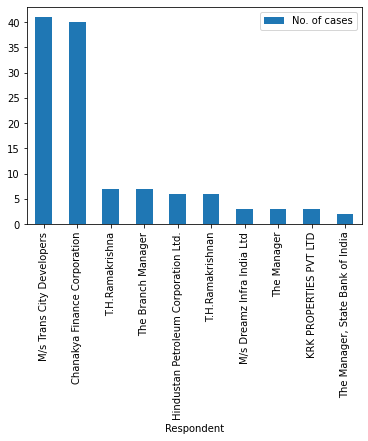

In [ ]:
data = {'Respondent': ['M/s Trans City Developers',
                        'Chanakya Finance Corporation',
                        'T.H.Ramakrishna',
                        'The Branch Manager',
                        'Hindustan Petroleum Corporation Ltd.',
                        'T.H.Ramakrishnan',
                        'M/s Dreamz Infra India Ltd',
                        'The Manager',
                        'KRK PROPERTIES PVT LTD',
                        'The Manager, State Bank of India'],
        'No. of cases': [41,40,7,7,6,6,3,3,3,2]
       }
  
df = pd.DataFrame(data,columns=['Respondent','No. of cases'])
df.plot(x ='Respondent', y='No. of cases', kind = 'bar')

In [ ]:
MH = df_MH.groupby('Respondent')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(MH)

                                                    Case No.
Respondent                                                  
VED SHLOK Through its Partners                            31
SHANTA MANGESH DEVELOPERS PVT.LTD.THROUGH DIREC...        15
SAIKALP ENTERPRISES Through MR. GIRISH P. PANCHAL         10
M/S.ZENAL CONSTRUCTIONS PVT.LTD.                           8
The State of Maharashtra through The Collector,...         6
M/s Zenal Construction Private Ltd                         6
ICICI Bank Ltd. etc.                                       5
DEFENCE CITY DEVELOPERS PVT.LTD.                           5
NEHRU NAGAR SHIVALAYA CHS.LTD.THROUGH ITS CHAIR...         4
MRS. RANJANA PATIL & ORS.                                  4


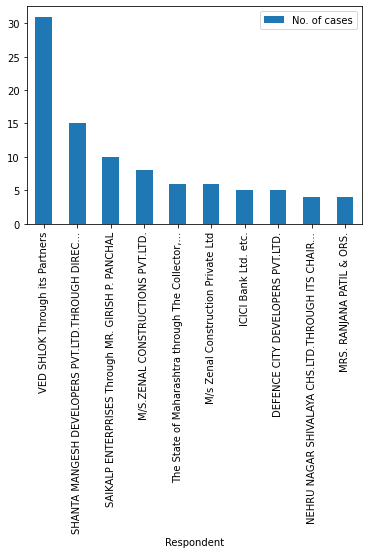

In [ ]:
data = {'Respondent': ['VED SHLOK Through its Partners',
                        'SHANTA MANGESH DEVELOPERS PVT.LTD.THROUGH DIREC...',
                        'SAIKALP ENTERPRISES Through MR. GIRISH P. PANCHAL',
                        'M/S.ZENAL CONSTRUCTIONS PVT.LTD.',
                        'The State of Maharashtra through The Collector,...',
                        'M/s Zenal Construction Private Ltd',
                        'ICICI Bank Ltd. etc.',
                        'DEFENCE CITY DEVELOPERS PVT.LTD.',
                        'NEHRU NAGAR SHIVALAYA CHS.LTD.THROUGH ITS CHAIR...',
                        'MRS. RANJANA PATIL & ORS.'],
        'No. of cases': [31,15,10,8,6,6,5,5,4,4]
       }
  
df = pd.DataFrame(data,columns=['Respondent','No. of cases'])
df.plot(x ='Respondent', y='No. of cases', kind = 'bar')

In [ ]:
TN = df_TN.groupby('Respondent')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(TN)

                                                    Case No.
Respondent                                                  
1.The Propreitor , Pazhamudhir Nilaiyam , And A...         4
1. The Propreitor , Sri Kannan Departmental Sto...         2
Mrs. Devikrishnan Alias, Dowmuny Day Doraisamy,...         1
M/s. Grove OMR Properties Private Ltd.,                    1
M/s. Shriprop Structures Pvt Ltd,                          1
M/s.Cox & Kings Ltd, Represented by its Managin...         1
M/s.Reliance Nippon Life Insurance Co Ltd, Rep ...         1
Manohar Krishnan,                                          1
Mantri Developers Pvt Ltd                                  1
Meenakshi D.Mohan                                          1


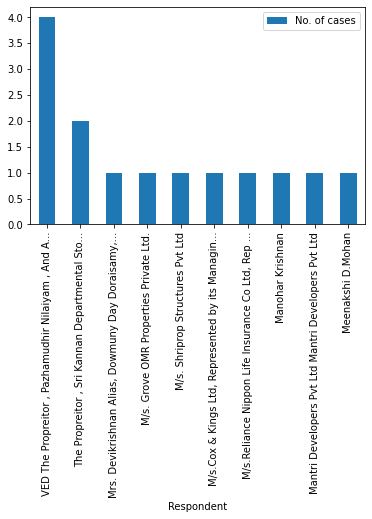

In [ ]:
data = {'Respondent': ['VED The Propreitor , Pazhamudhir Nilaiyam , And A...',
                        'The Propreitor , Sri Kannan Departmental Sto...',
                        'Mrs. Devikrishnan Alias, Dowmuny Day Doraisamy,...',
                        'M/s. Grove OMR Properties Private Ltd.',
                        'M/s. Shriprop Structures Pvt Ltd',
                        'M/s.Cox & Kings Ltd, Represented by its Managin...',
                        'M/s.Reliance Nippon Life Insurance Co Ltd, Rep ...',
                        'Manohar Krishnan',
                        'Mantri Developers Pvt Ltd Mantri Developers Pvt Ltd',
                        'Meenakshi D.Mohan'],
        'No. of cases': [4,2,1,1,1,1,1,1,1,1]
       }
  
df = pd.DataFrame(data,columns=['Respondent','No. of cases'])
df.plot(x ='Respondent', y='No. of cases', kind = 'bar')

In [ ]:
TG = df_TG.groupby('Respondent')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(TG)

                                                    Case No.
Respondent                                                  
1.The Manager, Micro Insurance Department,                78
1.Bharti Airtel Ltd.,                                     13
1.M/s. DLF Gayatri Developers                              9
Pothani Bhoomaiah                                          9
P. laxman Kumar                                            9
1.M/s. Alchemist Township India Ltd.,                      8
P. Ravikumar                                               6
1.Chief General Manager, Bharat Sanchar Nigam L...         5
1.The Manager, Micro Insurance Department                  4
1.Janachaitanya Housing P. Ltd.,                           4


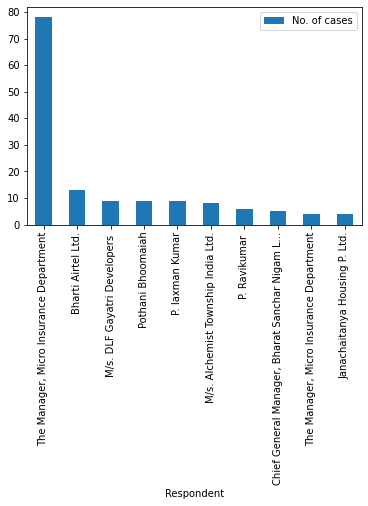

In [ ]:
data = {'Respondent': ['The Manager, Micro Insurance Department',
                        'Bharti Airtel Ltd.',
                        'M/s. DLF Gayatri Developers ',
                        'Pothani Bhoomaiah',
                        'P. laxman Kumar',
                        'M/s. Alchemist Township India Ltd.',
                        'P. Ravikumar ',
                        'Chief General Manager, Bharat Sanchar Nigam L...',
                        'The Manager, Micro Insurance Department',
                        'Janachaitanya Housing P. Ltd.'],
        'No. of cases': [78,13,9,9,9,8,6,5,4,4]
       }
  
df = pd.DataFrame(data,columns=['Respondent','No. of cases'])
df.plot(x ='Respondent', y='No. of cases', kind = 'bar')

In [ ]:
UP = df_UP.groupby('Respondent')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(UP)

                                     Case No.
Respondent                                   
KDP Infrastricture Pvt Ltd                 18
M/S Morpheus Developers Pvt Ltd            10
Ansal Properties and Infracture Ltd         9
United India Insurance co. Ltd.             6
L I C Of India                              5
National Insurance Co. Ltd                  5
Pashupati Ice and Cold Storage              5
Om Prakash                                  4
Punjab National Bank                        4
Oriental Insurance Co. Ltd                  4


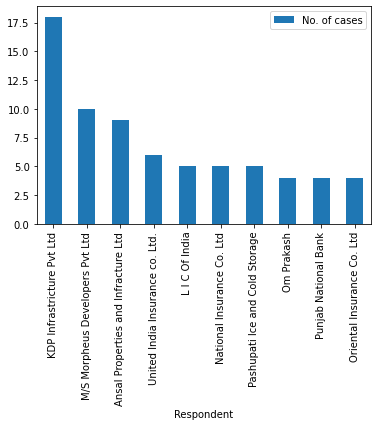

In [ ]:
data = {'Respondent': ['KDP Infrastricture Pvt Ltd',
                        'M/S Morpheus Developers Pvt Ltd',
                        'Ansal Properties and Infracture Ltd',
                        'United India Insurance co. Ltd.',
                        'L I C Of India',
                        'National Insurance Co. Ltd',
                        'Pashupati Ice and Cold Storage',
                        'Om Prakash',
                        'Punjab National Bank',
                        'Oriental Insurance Co. Ltd'],
        'No. of cases': [18,10,9,6,5,5,5,4,4,4]
       }
  
df = pd.DataFrame(data,columns=['Respondent','No. of cases'])
df.plot(x ='Respondent', y='No. of cases', kind = 'bar')

In [ ]:
WB = df_WB.groupby('Respondent')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(WB)

                                                    Case No.
Respondent                                                  
M/S Nobel Udyog                                            8
Aditya Mukherjee                                           8
Bengal Shelter Housing Development Ltd.                    5
M/S Chowdhury Construction                                 4
Bengal Unitech Universal Infrastructure Pvt. Ltd.          4
M/s. Millennium India Construction & Others                4
M/S Sombit Associates                                      4
Surya Developer                                            4
The Sector Manager, Sahara Credit Co-Operative ...         4
M/s. Sabita Construction and developement and o...         4


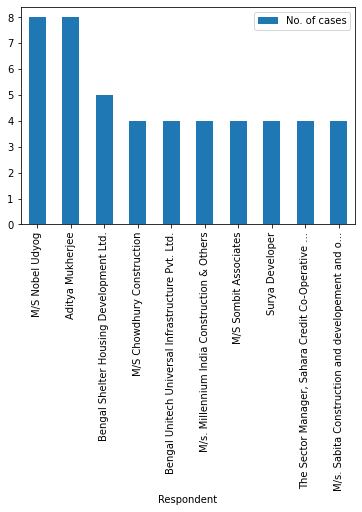

In [ ]:
data = {'Respondent': ['M/S Nobel Udyog',
                        'Aditya Mukherjee',
                        'Bengal Shelter Housing Development Ltd.',
                        'M/S Chowdhury Construction',
                        'Bengal Unitech Universal Infrastructure Pvt. Ltd.',
                        'M/s. Millennium India Construction & Others',
                        'M/S Sombit Associates',
                        'Surya Developer',
                        'The Sector Manager, Sahara Credit Co-Operative ...',
                        'M/s. Sabita Construction and developement and o...'],
        'No. of cases': [8,8,5,4,4,4,4,4,4,4]
       }
  
df = pd.DataFrame(data,columns=['Respondent','No. of cases'])
df.plot(x ='Respondent', y='No. of cases', kind = 'bar')

In [ ]:
delhi = df_DL.groupby('Complainant Advocate')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(delhi)

                      Case No.
Complainant Advocate          
VINAY KUMAR DUBEY           57
NIKHIL SINGH                31
SEEMA GUPTA                  9
MAHUA KALRA                  6
ANKUR                        3
V.K. SHARMA                  3
RAHUL LAL AKHRIYA            2
RAKESH KUMAR                 2
RAM N. SHARMA                2
RISHAB RAJ JAIN              2


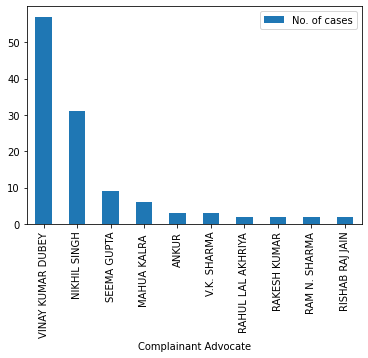

In [ ]:
data = {'Complainant Advocate': ['VINAY KUMAR DUBEY',
                        'NIKHIL SINGH',
                        'SEEMA GUPTA',
                        'MAHUA KALRA ',
                        'ANKUR',
                        'V.K. SHARMA',
                        'RAHUL LAL AKHRIYA',
                        'RAKESH KUMAR',
                        'RAM N. SHARMA',
                        'RISHAB RAJ JAIN'],
        'No. of cases': [57,31,9,6,3,3,2,2,2,2]
       }
  
df = pd.DataFrame(data,columns=['Complainant Advocate','No. of cases'])
df.plot(x ='Complainant Advocate', y='No. of cases', kind = 'bar')

In [ ]:
ka = df_KA.groupby('Complainant Advocate')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(ka)

                      Case No.
Complainant Advocate          
B.S.Ravi Kiran              45
B.C.Shivanne Gowda          43
N.J.Ramesh                  40
Prashanth.T.Pandit          28
Subramani.K.V.              19
Party Inperson              13
Shankar Gulli               11
Mohan Malge                 11
Prashanth Pandit            11
Prashanth T.Pandit          10


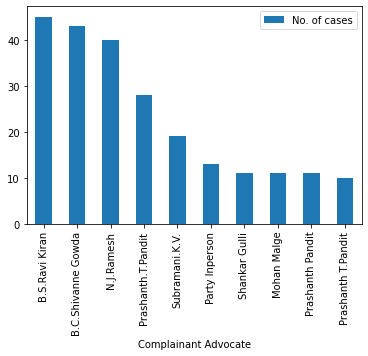

In [ ]:
data = {'Complainant Advocate': ['B.S.Ravi Kiran',
                        'B.C.Shivanne Gowda',
                        'N.J.Ramesh',
                        'Prashanth.T.Pandit',
                        'Subramani.K.V.',
                        'Party Inperson',
                        'Shankar Gulli',
                        'Mohan Malge',
                        'Prashanth Pandit',
                        'Prashanth T.Pandit'],
        'No. of cases': [45,43,40,28,19,13,11,11,11,10]
       }
  
df = pd.DataFrame(data,columns=['Complainant Advocate','No. of cases'])
df.plot(x ='Complainant Advocate', y='No. of cases', kind = 'bar')

In [ ]:
mh = df_MH.groupby('Complainant Advocate')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(mh)

                      Case No.
Complainant Advocate          
ADV.M.PANDEY                28
IN PERSON                   23
ADV.D.THAKARE               21
Manindra Pandey             20
ADV.SOLANKEY                20
ADV.P.MAKHIJANI             20
ADV.K.PATIL                 19
ADV.KINALEKAR               15
ADV.G.THAKUR                14
ADV.WAVIKAR                 14


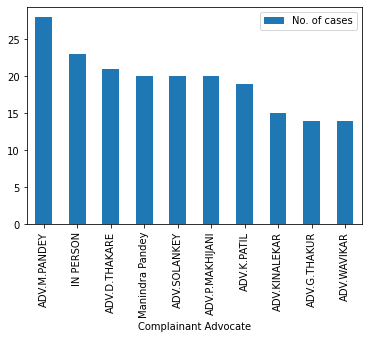

In [ ]:
data = {'Complainant Advocate': ['ADV.M.PANDEY',
                        'IN PERSON',
                        'ADV.D.THAKARE',
                        'Manindra Pandey',
                        'ADV.SOLANKEY',
                        'ADV.P.MAKHIJANI',
                        'ADV.K.PATIL',
                        'ADV.KINALEKAR',
                        'ADV.G.THAKUR',
                        'ADV.WAVIKAR'],
        'No. of cases': [28,23,21,20,20,20,19,15,14,14]
       }
  
df = pd.DataFrame(data,columns=['Complainant Advocate','No. of cases'])
df.plot(x ='Complainant Advocate', y='No. of cases', kind = 'bar')

In [ ]:
TG = df_TG.groupby('Complainant Advocate')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(TG)

                               Case No.
Complainant Advocate                   
M/s. Kunamalla Karunakar             81
M/s. Jitendra Jain                   24
KNV Radha Krishna                    23
PIP                                  22
Jitendra Jain PIP                    14
M/s. V. Gouri Sankara Rao            12
M/s. Nisaruddin Ahmed jeddy          10
M/s. Gopi Rajesh & Associates        10
M/s. Deepak Chowdary                  9
M/s. KRR Associates                   8


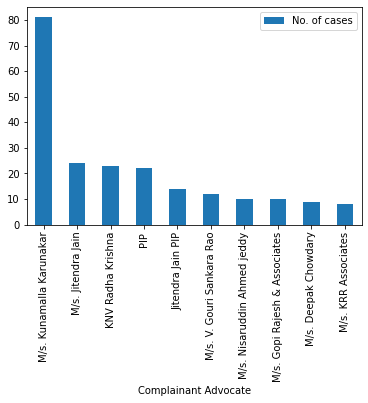

In [ ]:
data = {'Complainant Advocate': ['M/s. Kunamalla Karunakar',
                        'M/s. Jitendra Jain',
                        'KNV Radha Krishna',
                        'PIP',
                        'Jitendra Jain PIP',
                        'M/s. V. Gouri Sankara Rao',
                        'M/s. Nisaruddin Ahmed jeddy',
                        'M/s. Gopi Rajesh & Associates',
                        'M/s. Deepak Chowdary',
                        'M/s. KRR Associates'],
        'No. of cases': [81,24,23,22,14,12,10,10,9,8]
       }
  
df = pd.DataFrame(data,columns=['Complainant Advocate','No. of cases'])
df.plot(x ='Complainant Advocate', y='No. of cases', kind = 'bar')

In [ ]:
TN = df_TN.groupby('Complainant Advocate')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(TN)

                            Case No.
Complainant Advocate                
Party in person                   11
PARTY IN PERSON                    7
A.Ilaya perumal                    1
M/s.M.B.Gopalan Associates         1
Mr. K.R. Pughazhendhi              1
Mr. A. Ragupathy Raj               1
M/s.Suganth sam Abraham            1
M/s.S.Parthasarathy                1
M/s.S.M.Muralidharan               1
M/s.R.Arumugam                     1


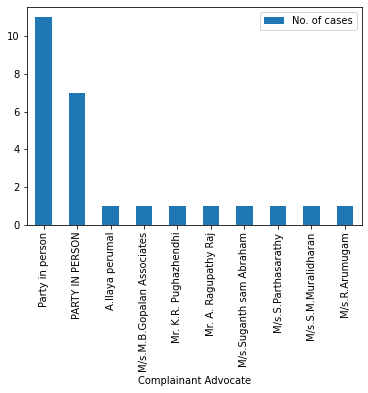

In [ ]:
data = {'Complainant Advocate': ['Party in person',
                        'PARTY IN PERSON',
                        'A.Ilaya perumal',
                        'M/s.M.B.Gopalan Associates',
                        'Mr. K.R. Pughazhendhi',
                        'Mr. A. Ragupathy Raj',
                        'M/s.Suganth sam Abraham',
                        'M/s.S.Parthasarathy',
                        'M/s.S.M.Muralidharan',
                        'M/s.R.Arumugam'],
        'No. of cases': [11,7,1,1,1,1,1,1,1,1]
       }
  
df = pd.DataFrame(data,columns=['Complainant Advocate','No. of cases'])
df.plot(x ='Complainant Advocate', y='No. of cases', kind = 'bar')

In [ ]:
UP = df_UP.groupby('Complainant Advocate')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(UP)

                      Case No.
Complainant Advocate          
Isar Husain                 43
Sarvesh Kumar Sharma        27
Sanjay Jaiswal              25
Naveen Kumar Tiwari         24
S.N. Tiwari                 23
V.S. Bisaria                22
Tara Gupta                  22
Self                        21
Sanjay Kumar Verma          20
Anil Kumar Mishra           19


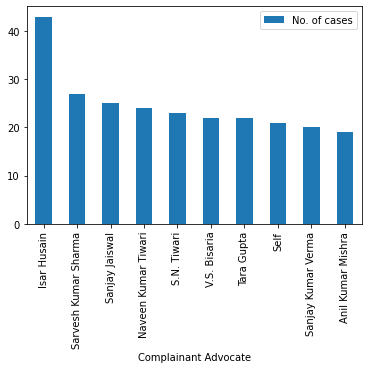

In [ ]:
data = {'Complainant Advocate': ['Isar Husain',
                        'Sarvesh Kumar Sharma',
                        'Sanjay Jaiswal',
                        'Naveen Kumar Tiwari',
                        'S.N. Tiwari',
                        'V.S. Bisaria',
                        'Tara Gupta',
                        'Self',
                        'Sanjay Kumar Verma',
                        'Anil Kumar Mishra'],
        'No. of cases': [43,27,25,24,23,22,22,21,20,19]
       }
  
df = pd.DataFrame(data,columns=['Complainant Advocate','No. of cases'])
df.plot(x ='Complainant Advocate', y='No. of cases', kind = 'bar')

In [ ]:
WB = df_WB.groupby('Complainant Advocate')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(WB)

                                                    Case No.
Complainant Advocate                                        
Mr. Prasanta Banerjee                                     26
Mr. Amarnath Sanyal                                       19
In-person                                                 17
Mr. Barun Prasad                                          13
Mr. Avijit Bhuina                                         12
Mr. Barun Prasad, Mr. Subrata Mondal, Mr. Sovan...         9
Mr. Dipankar Pal                                           9
Mr. Deb Kr. Sen                                            8
Mr. Amit Pachal                                            8
Mr. Debesh Halder                                          7


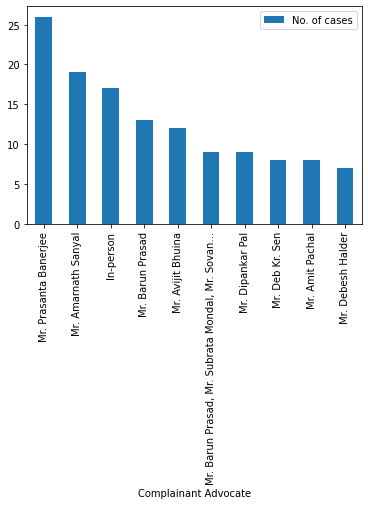

In [ ]:
data = {'Complainant Advocate': ['Mr. Prasanta Banerjee',
                        'Mr. Amarnath Sanyal',
                        'In-person',
                        'Mr. Barun Prasad',
                        'Mr. Avijit Bhuina',
                        'Mr. Barun Prasad, Mr. Subrata Mondal, Mr. Sovan...',
                        'Mr. Dipankar Pal',
                        'Mr. Deb Kr. Sen',
                        'Mr. Amit Pachal',
                        'Mr. Debesh Halder'],
        'No. of cases': [26,19,17,13,12,9,9,8,8,7]
       }
  
df = pd.DataFrame(data,columns=['Complainant Advocate','No. of cases'])
df.plot(x ='Complainant Advocate', y='No. of cases', kind = 'bar')

In [ ]:
delhi = df_DL.groupby('Respondent Advocate')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(delhi)

Empty DataFrame
Columns: [Case No.]
Index: []


In [ ]:
KA = df_KA.groupby('Respondent Advocate')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(KA)

                                  Case No.
Respondent Advocate                       
A.K.S                                    1
ARV                                      1
Abhinav R                                1
Arjun R Khot                             1
Bopanna K                                1
I & III svd, II N R                      1
I.P(Kulkarni-1-3)                        1
M.G.S                                    1
Narendra Dev                             1
Reshma Thammaiah-1 & Ravi Ravi-2         1


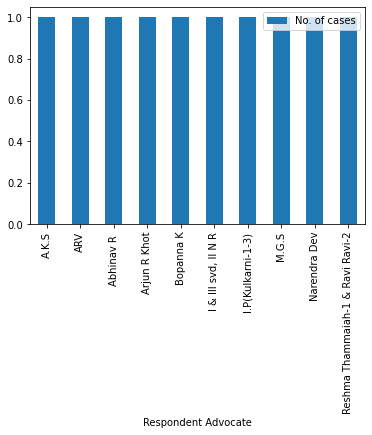

In [ ]:
data = {'Respondent Advocate': ['A.K.S',
                        'ARV',
                        'Abhinav R ',
                        'Arjun R Khot',
                        'Bopanna K',
                        'I & III svd, II N R',
                        'I.P(Kulkarni-1-3)',
                        'M.G.S',
                        'Narendra Dev',
                        'Reshma Thammaiah-1 & Ravi Ravi-2'],
        'No. of cases': [1,1,1,1,1,1,1,1,1,1]
       }
  
df = pd.DataFrame(data,columns=['Respondent Advocate','No. of cases'])
df.plot(x ='Respondent Advocate', y='No. of cases', kind = 'bar')

In [ ]:
MH = df_MH.groupby('Respondent Advocate')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(MH)

Empty DataFrame
Columns: [Case No.]
Index: []


In [ ]:
TG = df_TG.groupby('Respondent Advocate')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(TG)

                        Case No.
Respondent Advocate             
PIP                            4
B. Srinivas                    1
M/s. CCN Gandhi                1
M/s. K. Visweswara RAo         1
M/s. M. Hara Gopal rao         1
M/s. Mr. B. Srinivas           1
M/s. Nelson Mathew             1
N.Amarnath                     1
P. Kameshwara Rao              1


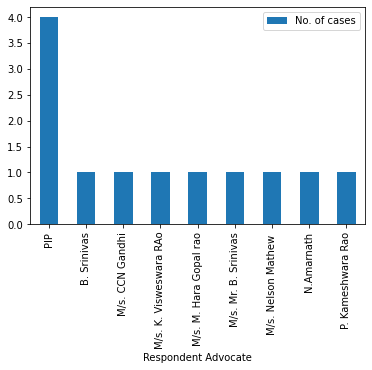

In [ ]:
data = {'Respondent Advocate': ['PIP',
                        'B. Srinivas',
                        'M/s. CCN Gandhi',
                        'M/s. K. Visweswara RAo',
                        'M/s. M. Hara Gopal rao',
                        'M/s. Mr. B. Srinivas',
                        'M/s. Nelson Mathew ',
                        'N.Amarnath',
                        'P. Kameshwara Rao'],
        'No. of cases': [4,1,1,1,1,1,1,1,1]
       }
  
df = pd.DataFrame(data,columns=['Respondent Advocate','No. of cases'])
df.plot(x ='Respondent Advocate', y='No. of cases', kind = 'bar')

In [ ]:
TN = df_TN.groupby('Respondent Advocate')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(TN)

                                       Case No.
Respondent Advocate                            
-                                            28
M/s. R. Sivaraman                             1
Sarvebhauman-R1 Sampath kumar Asso-R2         1


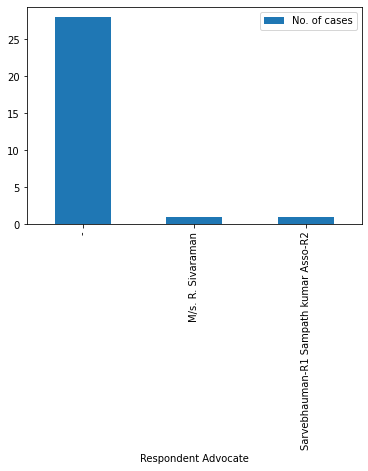

In [ ]:
data = {'Respondent Advocate': ['-',
                        'M/s. R. Sivaraman',
                        'Sarvebhauman-R1 Sampath kumar Asso-R2'],
        'No. of cases': [28,1,1]
       }
  
df = pd.DataFrame(data,columns=['Respondent Advocate','No. of cases'])
df.plot(x ='Respondent Advocate', y='No. of cases', kind = 'bar')

In [ ]:
UP = df_UP.groupby('Respondent Advocate')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(UP)
WB = df_WB.groupby('Respondent Advocate')[['Case No.']].count().sort_values(['Case No.'], ascending=False).head(10)
print(WB)

                                 Case No.
Respondent Advocate                      
Self                                   24
No Advocate (OP)                       15
Sushil Kumar Sharma                    10
Sanjay Kumar Verma                      9
B.K. Upadhyay                           7
Mujeeb Effendi                          7
Pratul Pratap Singh Adeel Ahmad         6
Muzeef Efendi                           6
S.P. Pandey                             5
Umesh Kumar Sharma                      4
                                        Case No.
Respondent Advocate                             
Mr. Barun Prasad                              18
Mr. Abhik Kr. Das                             11
Inperson/                                      8
Ms. Binota Roy                                 8
Ms. Tanusree Dhar                              6
Mr. Rajesh Biswas                              5
Mr. Madan Mohon Das.                           5
Mr. Prabir Basu                                5
Smt. R

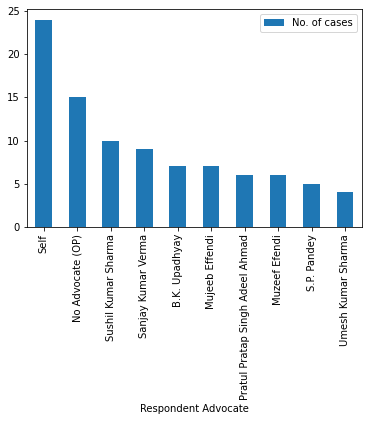

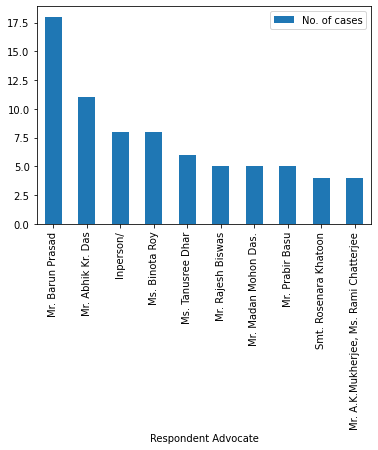

In [ ]:
data = {'Respondent Advocate': ['Self',
                        'No Advocate (OP)',
                        'Sushil Kumar Sharma',
                        'Sanjay Kumar Verma',
                        'B.K. Upadhyay',
                        'Mujeeb Effendi',
                        'Pratul Pratap Singh Adeel Ahmad',
                        'Muzeef Efendi',
                        'S.P. Pandey',
                        'Umesh Kumar Sharma'],
        'No. of cases': [24,15,10,9,7,7,6,6,5,4]
       }
  
df = pd.DataFrame(data,columns=['Respondent Advocate','No. of cases'])
df.plot(x ='Respondent Advocate', y='No. of cases', kind = 'bar')
data = {'Respondent Advocate': ['Mr. Barun Prasad',
                        'Mr. Abhik Kr. Das',
                        'Inperson/',
                        'Ms. Binota Roy',
                        'Ms. Tanusree Dhar',
                        'Mr. Rajesh Biswas',
                        'Mr. Madan Mohon Das.',
                        'Mr. Prabir Basu',
                        'Smt. Rosenara Khatoon',
                        'Mr. A.K.Mukherjee, Ms. Rami Chatterjee'],
        'No. of cases': [18,11,8,8,6,5,5,5,4,4]
       }
  
df = pd.DataFrame(data,columns=['Respondent Advocate','No. of cases'])
df.plot(x ='Respondent Advocate', y='No. of cases', kind = 'bar')

In [ ]:
df_DL['st_dt'] = pd.to_datetime(df_DL['Date of Filing'], errors='coerce', format='%d-%m-%Y')
df_DL['end_dt'] = pd.to_datetime(df_DL['Date of Disposal'], errors='coerce', format='%d-%m-%Y')
df_DL['diff'] = (df_DL['end_dt'] - df_DL['st_dt']).dt.days
#print (df_DL.head())
DL1 =df_DL.sort_values(['diff'], ascending=False).head(10)
DL2 =df_DL.sort_values(['diff'], ascending=True).head(10) 
print(DL1[['Case No.','diff']])
print(DL2[['Case No.','diff']])

        Case No.  diff
316  CC/474/2019   960
315   A/284/2019   935
310  CC/213/2019   924
308  CC/238/2019   879
305  CC/359/2019   838
303  CC/163/2019   817
311   EA/79/2019   801
307  CC/547/2019   789
306  CC/546/2019   789
299  CC/153/2019   782
        Case No.  diff
211   RP/79/2019     0
333  CC/195/2020     2
79    A/414/2019     4
336    RA/6/2020     5
363  IA/505/2021     7
332   A/101/2020     7
366    A/57/2021     7
355   RA/10/2021     8
46   CC/439/2019     8
45   CC/434/2019     9


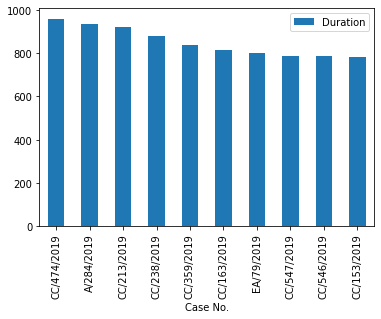

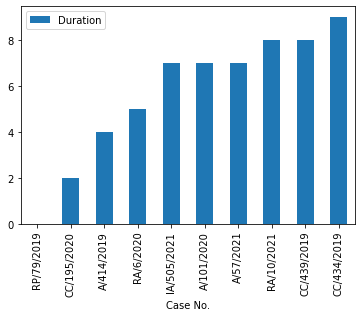

In [ ]:
data = {'Case No.': ['CC/474/2019',
                        'A/284/2019',
                        'CC/213/2019',
                        'CC/238/2019',
                        'CC/359/2019',
                        'CC/163/2019',
                        'EA/79/2019',
                        'CC/547/2019',
                        'CC/546/2019',
                        'CC/153/2019'],
        'Duration': [960,935,924,879,838,817,801,789,789,782]
       }
df = pd.DataFrame(data,columns=['Case No.','Duration'])
df.plot(x ='Case No.', y='Duration', kind = 'bar')
data = {'Case No.': ['RP/79/2019',
                        'CC/195/2020',
                        'A/414/2019',
                        'RA/6/2020',
                        'IA/505/2021',
                        'A/101/2020',
                        'A/57/2021',
                        'RA/10/2021',
                        'CC/439/2019',
                        'CC/434/2019'],
        'Duration': [0,2,4,5,7,7,7,8,8,9]
       }
df = pd.DataFrame(data,columns=['Case No.','Duration'])
df.plot(x ='Case No.', y='Duration', kind = 'bar')

In [ ]:
df_KA['st_dt'] = pd.to_datetime(df_KA['Date of Filing'], errors='coerce', format='%d-%m-%Y')
df_KA['end_dt'] = pd.to_datetime(df_KA['Date of Disposal'], errors='coerce', format='%d-%m-%Y')
df_KA['diff'] = (df_KA['end_dt'] - df_KA['st_dt']).dt.days
#print (df_DL.head())
KA1 =df_KA.sort_values(['diff'], ascending=False).head(10)
KA2 =df_KA.sort_values(['diff'], ascending=True).head(10)
print(KA1[['Case No.','diff']])
print(KA2[['Case No.','diff']])

        Case No.  diff
98    A/236/2019  1072
99   CC/123/2019  1052
100   A/791/2019  1001
78     A/16/2019   973
82    A/457/2019   938
68    A/298/2019   917
65    CC/82/2019   917
93   A/1046/2019   869
94   A/1047/2019   869
43    A/185/2019   864
      Case No.  diff
377  A/92/2021     1
378  A/93/2021     1
381  A/96/2021     1
384  A/99/2021     1
376  A/91/2021     1
375  A/90/2021     1
374  A/89/2021     1
373  A/88/2021     1
379  A/94/2021     1
372  A/87/2021     1


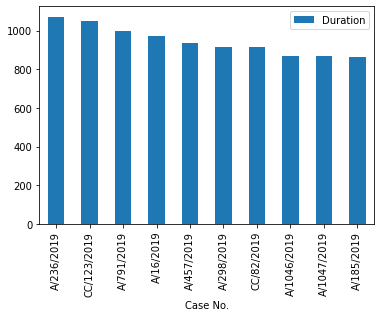

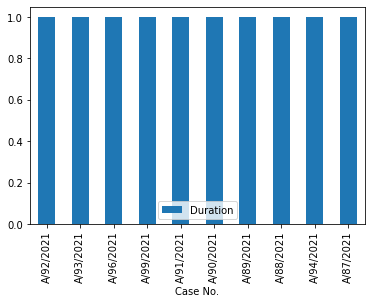

In [ ]:
data = {'Case No.': ['A/236/2019',
                        'CC/123/2019',
                        'A/791/2019',
                        'A/16/2019',
                        'A/457/2019',
                        'A/298/2019',
                        'CC/82/2019',
                        'A/1046/2019',
                        'A/1047/2019',
                        'A/185/2019'],
        'Duration': [1072,1052,1001,973,938,917,917,869,869,864]
       }
df = pd.DataFrame(data,columns=['Case No.','Duration'])
df.plot(x ='Case No.', y='Duration', kind = 'bar')
data = {'Case No.': ['A/92/2021',
                        'A/93/2021',
                        'A/96/2021',
                        'A/99/2021',
                        'A/91/2021',
                        'A/90/2021',
                        'A/89/2021',
                        'A/88/2021',
                        'A/94/2021',
                        'A/87/2021'],
        'Duration': [1,1,1,1,1,1,1,1,1,1]
       }
df = pd.DataFrame(data,columns=['Case No.','Duration'])
df.plot(x ='Case No.', y='Duration', kind = 'bar')

In [ ]:
df_MH['st_dt'] = pd.to_datetime(df_MH['Date of Filing'], errors='coerce', format='%d-%m-%Y')
df_MH['end_dt'] = pd.to_datetime(df_MH['Date of Disposal'], errors='coerce', format='%d-%m-%Y')
df_MH['diff'] = (df_MH['end_dt'] - df_MH['st_dt']).dt.days
#print (df_DL.head())
MH1 =df_MH.sort_values(['diff'], ascending=False).head(10)
MH2 =df_MH.sort_values(['diff'], ascending=True).head(10)
print(MH1[['Case No.','diff']])
print(MH2[['Case No.','diff']])

      Case No.  diff
473   A/19/181  1021
468  CC/19/118  1015
450   MA/19/90   984
449   A/19/161   984
465  CC/19/128   983
472   A/19/455   960
452  CC/19/140   957
461  MA/19/156   948
459   A/19/311   948
435   CC/19/84   946
      Case No.  diff
117  MA/19/413     0
632    RP/21/3     0
191  RP/19/231     0
729   RA/21/13     0
647  MA/21/111     1
182  EA/19/105     1
515    RP/20/7     1
183  EA/19/106     1
648  MA/21/112     1
531   RP/20/69     1


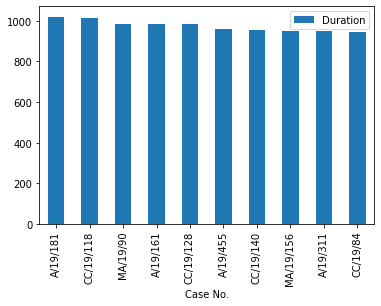

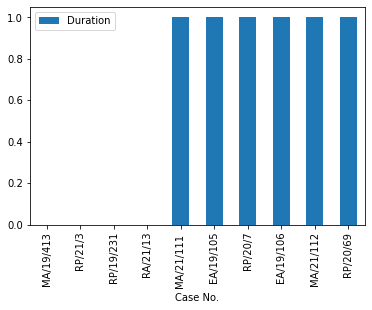

In [ ]:
data = {'Case No.': ['A/19/181',
                        'CC/19/118',
                        'MA/19/90',
                        'A/19/161',
                        'CC/19/128',
                        'A/19/455',
                        'CC/19/140',
                        'MA/19/156',
                        'A/19/311',
                        'CC/19/84'],
        'Duration': [1021,1015,984,984,983,960,957,948,948,946]
       }
df = pd.DataFrame(data,columns=['Case No.','Duration'])
df.plot(x ='Case No.', y='Duration', kind = 'bar')
data = {'Case No.': ['MA/19/413',
                        'RP/21/3',
                        'RP/19/231',
                        'RA/21/13',
                        'MA/21/111 ',
                        'EA/19/105',
                        'RP/20/7',
                        'EA/19/106',
                        'MA/21/112',
                        'RP/20/69'],
        'Duration': [0,0,0,0,1,1,1,1,1,1]
       }
df = pd.DataFrame(data,columns=['Case No.','Duration'])
df.plot(x ='Case No.', y='Duration', kind = 'bar')

In [ ]:
df_TN['st_dt'] = pd.to_datetime(df_TN['Date of Filing'], errors='coerce', format='%d-%m-%Y')
df_TN['end_dt'] = pd.to_datetime(df_TN['Date of Disposal'], errors='coerce', format='%d-%m-%Y')
df_TN['diff'] = (df_TN['end_dt'] - df_TN['st_dt']).dt.days
#print (df_DL.head())
TN1 =df_TN.sort_values(['diff'], ascending=False).head(10)
TN2 =df_TN.sort_values(['diff'], ascending=True).head(10)
print(TN1[['Case No.','diff']])
print(TN2[['Case No.','diff']])

      Case No.  diff
24  A/209/2019  1049
28   A/14/2019  1028
30  CC/25/2019  1016
38  A/127/2019   990
29   A/63/2019   981
35  CC/59/2019   969
22   A/31/2019   968
20   A/42/2019   914
36  CC/74/2019   904
17   A/64/2019   883
       Case No.  diff
44    RP/3/2021    20
2    A/271/2019    65
1   FA/190/2019    69
3    A/170/2019   154
4    A/171/2019   154
5    A/172/2019   154
6    A/173/2019   154
7    A/174/2019   154
8    A/175/2019   154
9    A/176/2019   154


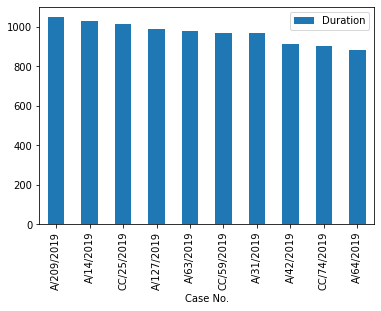

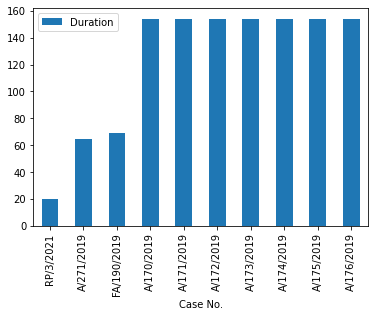

In [ ]:
data = {'Case No.': ['A/209/2019',
                        'A/14/2019',
                        'CC/25/2019',
                        'A/127/2019',
                        'A/63/2019',
                        'CC/59/2019',
                        'A/31/2019',
                        'A/42/2019',
                        'CC/74/2019',
                        'A/64/2019'],
        'Duration': [1049,1028,1016,990,981,969,968,914,904,883]
       }
df = pd.DataFrame(data,columns=['Case No.','Duration'])
df.plot(x ='Case No.', y='Duration', kind = 'bar')
data = {'Case No.': ['RP/3/2021',
                        'A/271/2019',
                        'FA/190/2019',
                        'A/170/2019',
                        'A/171/2019',
                        'A/172/2019',
                        'A/173/2019',
                        'A/174/2019',
                        'A/175/2019',
                     'A/176/2019'],
        'Duration': [20,65,69,154,154,154,154,154,154,154]
       }
df = pd.DataFrame(data,columns=['Case No.','Duration'])
df.plot(x ='Case No.', y='Duration', kind = 'bar')

In [ ]:
df_TG['st_dt'] = pd.to_datetime(df_TG['Date of Filing'], errors='coerce', format='%d-%m-%Y')
df_TG['end_dt'] = pd.to_datetime(df_TG['Date of Disposal'], errors='coerce', format='%d-%m-%Y')
df_TG['diff'] = (df_TG['end_dt'] - df_TG['st_dt']).dt.days
#print (df_DL.head())
TG1 =df_TG.sort_values(['diff'], ascending=False).head(10)
TG2 =df_TG.sort_values(['diff'], ascending=True).head(10)
print(TG1[['Case No.','diff']])
print(TG2[['Case No.','diff']])

       Case No.  diff
213   CC/9/2019  1109
205  CC/18/2019  1063
191   A/69/2019  1033
192   A/70/2019  1033
193   A/71/2019  1033
194   A/72/2019  1033
195   A/73/2019  1033
212  CC/58/2019  1027
180   A/79/2019  1010
189  A/134/2019   995
       Case No.  diff
0     RP/2/2019     0
24   RP/28/2019     0
301  A/742/2020     0
234   RP/6/2020     1
233   RP/5/2020     1
232   RP/4/2020     1
231   RP/3/2020     1
230  RP/24/2020     1
229  RP/23/2020     1
227  RP/21/2020     1


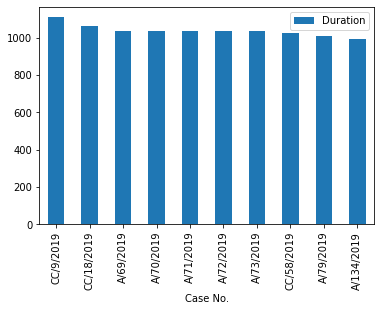

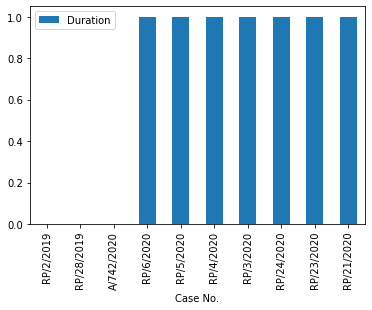

In [ ]:
data = {'Case No.': ['CC/9/2019',
                        'CC/18/2019',
                        'A/69/2019',
                        'A/70/2019',
                        'A/71/2019',
                        'A/72/2019',
                        'A/73/2019',
                        'CC/58/2019',
                        'A/79/2019',
                        'A/134/2019'],
        'Duration': [1109,1063,1033,1033,1033,1033,1033,1027,1010,995]
       }
df = pd.DataFrame(data,columns=['Case No.','Duration'])
df.plot(x ='Case No.', y='Duration', kind = 'bar')
data = {'Case No.': ['RP/2/2019',
                        'RP/28/2019',
                        'A/742/2020',
                        'RP/6/2020',
                        'RP/5/2020',
                        'RP/4/2020',
                        'RP/3/2020',
                        'RP/24/2020',
                        'RP/23/2020',
                     'RP/21/2020'],
        'Duration': [0,0,0,1,1,1,1,1,1,1]
       }
df = pd.DataFrame(data,columns=['Case No.','Duration'])
df.plot(x ='Case No.', y='Duration', kind = 'bar')

In [ ]:
df_UP['st_dt'] = pd.to_datetime(df_UP['Date of Filing'], errors='coerce', format='%d-%m-%Y')
df_UP['end_dt'] = pd.to_datetime(df_UP['Date of Disposal'], errors='coerce', format='%d-%m-%Y')
df_UP['diff'] = (df_UP['end_dt'] - df_UP['st_dt']).dt.days
#print (df_DL.head())
UP1 =df_UP.sort_values(['diff'], ascending=False).head(10)
UP2 =df_UP.sort_values(['diff'], ascending=True).head(10)
print(UP1[['Case No.','diff']])
print(UP2[['Case No.','diff']])

       Case No.  diff
659  EA/25/2019  1035
658  EA/20/2019  1035
657  EA/19/2019  1035
653  A/220/2019  1033
654  A/240/2019  1030
642   EA/8/2019  1028
655  A/339/2019  1012
643  A/281/2019  1007
649  A/340/2019  1003
644  RP/15/2019  1000
         Case No.  diff
863    RA/14/2020     0
716    MA/54/2020     0
1059   MA/71/2021     0
785   MA/134/2020     0
673    MA/19/2020     0
674    MA/20/2020     0
270   A/1080/2019     0
685    A/109/2020     0
368   MA/247/2019     0
1121  AEA/23/2021     0


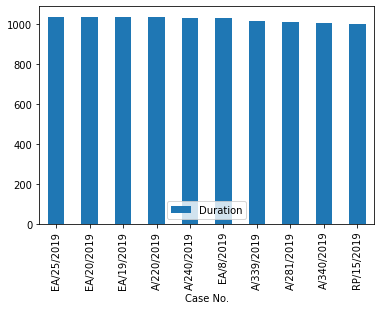

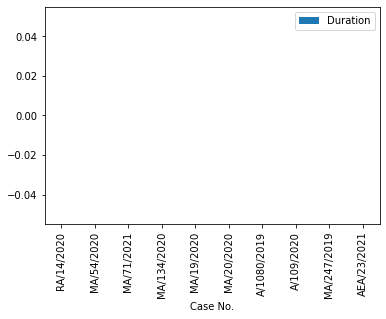

In [ ]:
data = {'Case No.': ['EA/25/2019',
                        'EA/20/2019',
                        'EA/19/2019',
                        'A/220/2019',
                        'A/240/2019',
                        'EA/8/2019',
                        'A/339/2019',
                        'A/281/2019',
                        'A/340/2019',
                        'RP/15/2019'],
        'Duration': [1035,1035,1035,1033,1030,1028,1012,1007,1003,1000]
       }
df = pd.DataFrame(data,columns=['Case No.','Duration'])
df.plot(x ='Case No.', y='Duration', kind = 'bar')
data = {'Case No.': ['RA/14/2020',
                        'MA/54/2020',
                        'MA/71/2021',
                        'MA/134/2020',
                        'MA/19/2020',
                        'MA/20/2020',
                        'A/1080/2019',
                        'A/109/2020',
                        'MA/247/2019',
                     'AEA/23/2021'],
        'Duration': [0,0,0,0,0,0,0,0,0,0]
       }
df = pd.DataFrame(data,columns=['Case No.','Duration'])
df.plot(x ='Case No.', y='Duration', kind = 'bar')

In [ ]:
df_WB['st_dt'] = pd.to_datetime(df_WB['Date of Filing'], errors='coerce', format='%d-%m-%Y')
df_WB['end_dt'] = pd.to_datetime(df_WB['Date of Disposal'], errors='coerce', format='%d-%m-%Y')
df_WB['diff'] = (df_WB['end_dt'] - df_WB['st_dt']).dt.days
#print (df_DL.head())
WB1 =df_WB.sort_values(['diff'], ascending=False).head(10)
WB2 =df_WB.sort_values(['diff'], ascending=True).head(10)
print(WB1[['Case No.','diff']])
print(WB2[['Case No.','diff']])

        Case No.  diff
700   CC/65/2019  1118
701    A/82/2019  1115
702    A/83/2019  1115
695  CC/141/2019  1068
698   A/274/2019  1060
688   A/175/2019  1056
674   CC/51/2019  1051
668    A/59/2019  1041
697   A/313/2019  1040
657     A/4/2019  1040
         Case No.  diff
0      IA/38/2019     1
407    TA/61/2019     1
1104  TA/156/2021     1
406    TA/60/2019     1
1103  TA/155/2021     1
1102  TA/154/2021     1
1101  TA/153/2021     1
1100  TA/152/2021     1
1099  TA/151/2021     1
1098  TA/150/2021     1


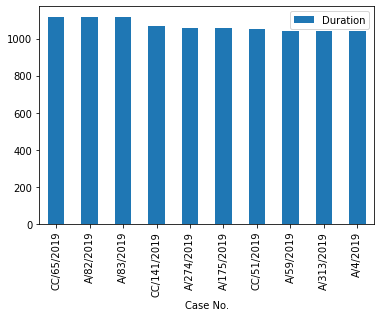

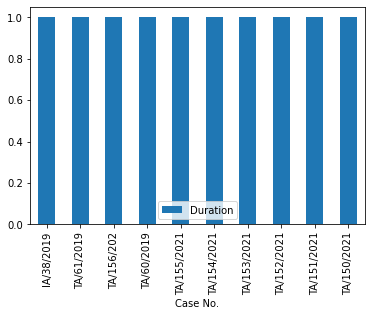

In [ ]:
data = {'Case No.': ['CC/65/2019',
                        'A/82/2019',
                        'A/83/2019',
                        'CC/141/2019',
                        'A/274/2019',
                        'A/175/2019',
                        'CC/51/2019',
                        'A/59/2019',
                        'A/313/2019',
                        'A/4/2019'],
        'Duration': [1118,1115,1115,1068,1060,1056,1051,1041,1040,1040]
       }
df = pd.DataFrame(data,columns=['Case No.','Duration'])
df.plot(x ='Case No.', y='Duration', kind = 'bar')
data = {'Case No.': ['IA/38/2019',
                        'TA/61/2019',
                        'TA/156/202',
                        'TA/60/2019',
                        'TA/155/2021',
                        'TA/154/2021',
                        'TA/153/2021',
                        'TA/152/2021',
                        'TA/151/2021',
                     'TA/150/2021'],
        'Duration': [1,1,1,1,1,1,1,1,1,1]
       }
df = pd.DataFrame(data,columns=['Case No.','Duration'])
df.plot(x ='Case No.', y='Duration', kind = 'bar')